In [1]:
# importing necessary libraries

import warnings
warnings.filterwarnings("ignore")
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression,SGDClassifier,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,auc,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

<center>  <h1>DATA UNDERSTANDING</h1> </center>

In [2]:
#loading the dataset 

path="C:\\Users\\91755\\Downloads\\bank+marketing (1)\\bank-additional\\bank-additional\\bank-additional-full.csv"
df=pd.read_csv(path,sep=';')

[Dataset description](https://github.com/Sudeeshg300398/FINANCE/blob/main/bank_telemarketing_success_prediction/data_understanding(dataset_desc).txt)

In [3]:
# a quick overview and an inspect on the contents of the dataset

print("First five rows of the dataset")
df.head()

First five rows of the dataset


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# shape of the dataset

print(f"Shape_of_the_dataset : {df.shape}")

Shape_of_the_dataset : (41188, 21)


In [5]:
# looking for any duplicated rows in the dataset

duplicated = df[df.duplicated()]

no_of_duplicated_rows = len(duplicated)

print(f"There are {no_of_duplicated_rows} duplicated records on the dataset")

There are 12 duplicated records on the dataset


In [6]:
# dropping duplicates

df = df.drop_duplicates()

print(f"Shape_of_the_refined_dataset : {df.shape}")

Shape_of_the_refined_dataset : (41176, 21)


In [7]:
#copying the dataset for furthur analysis

df_ref=df.copy()
df_ref.shape

(41176, 21)

In [8]:
# dataset information

df_ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [9]:
# summary_statistic of numerical columns

df_ref.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


=========================================================================================================================== 
                                                   
                                                   SUMMARY STATISTICS

===========================================================================================================================

**Age:**

Average age is around 40 years, with a minimum of 17 and a maximum of 98.

Most customers fall between the ages of 32 and 47.


**Duration:**

The average contact duration is approximately 258 seconds (about 4.3 minutes).

Duration varies widely, with a minimum of 0 seconds and a maximum of 4918 seconds (about 82 minutes).

The majority of calls last less than 5 minutes, with a median duration of 180 seconds.

Standard deviation of duration indicates variability in call lengths.


**Campaign:**

On average, customers were contacted around 2.6 times during the campaign.

The number of contacts per campaign ranges from 1 to 56.

**Pdays:**

The majority of clients were not previously contacted (999), with an average of around 962 days since the last contact.


**Previous:**

Most clients had no previous contacts, with an average of 0.17 contacts.

**Economic Indicators:**

Employment variation rate (emp.var.rate) ranges from -3.4% to 1.4%.

Consumer price index (cons.price.idx) has a notable standard deviation, indicating variability.

Consumer confidence index (cons.conf.idx) ranges from -50.8 to -26.9.


**Euribor 3-month Rate and Number of Employees:**

The Euribor 3-month rate (euribor3m) and the number of employees (nr.employed) exhibit variations.



In [10]:
# summary_statistic of categorical columns

df_ref.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [11]:
df_ref.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


=========================================================================================================================== 
                                                   
                                                   CORRELATION SUMMARY

===========================================================================================================================

**Age and Other Variables:**

Age has a weak positive correlation with economic indicators such as employment variation rate (emp.var.rate) and Euribor 3-month rate (euribor3m).

**Duration and Campaign:**

There is a negative correlation between call duration and the number of contacts during the campaign (campaign). Longer calls tend to be associated with fewer campaign contacts.

**Economic Indicators:**

Strong positive correlations exist among economic indicators (emp.var.rate, cons.price.idx, euribor3m, nr.employed).

**Pdays and Previous:**

No apparent strong correlation between the number of days since the last contact (pdays) and the number of previous contacts (previous).

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================


1.The dataset primarily consists of customers aged between 17 and 98, with variations in contact duration, campaign interactions, and economic indicators.


2.Most customers have not been contacted before this campaign (pdays with high values, possibly 999, indicating no previous contact).


3.Economic indicators (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) exhibit correlations, suggesting interdependence.


4.Duration and campaign interactions show weak correlations with age, economic indicators, and each other.

<center>  <h2>DATA EXPLORATION</h2> </center>

**UNIVARIATE ANALYSIS**

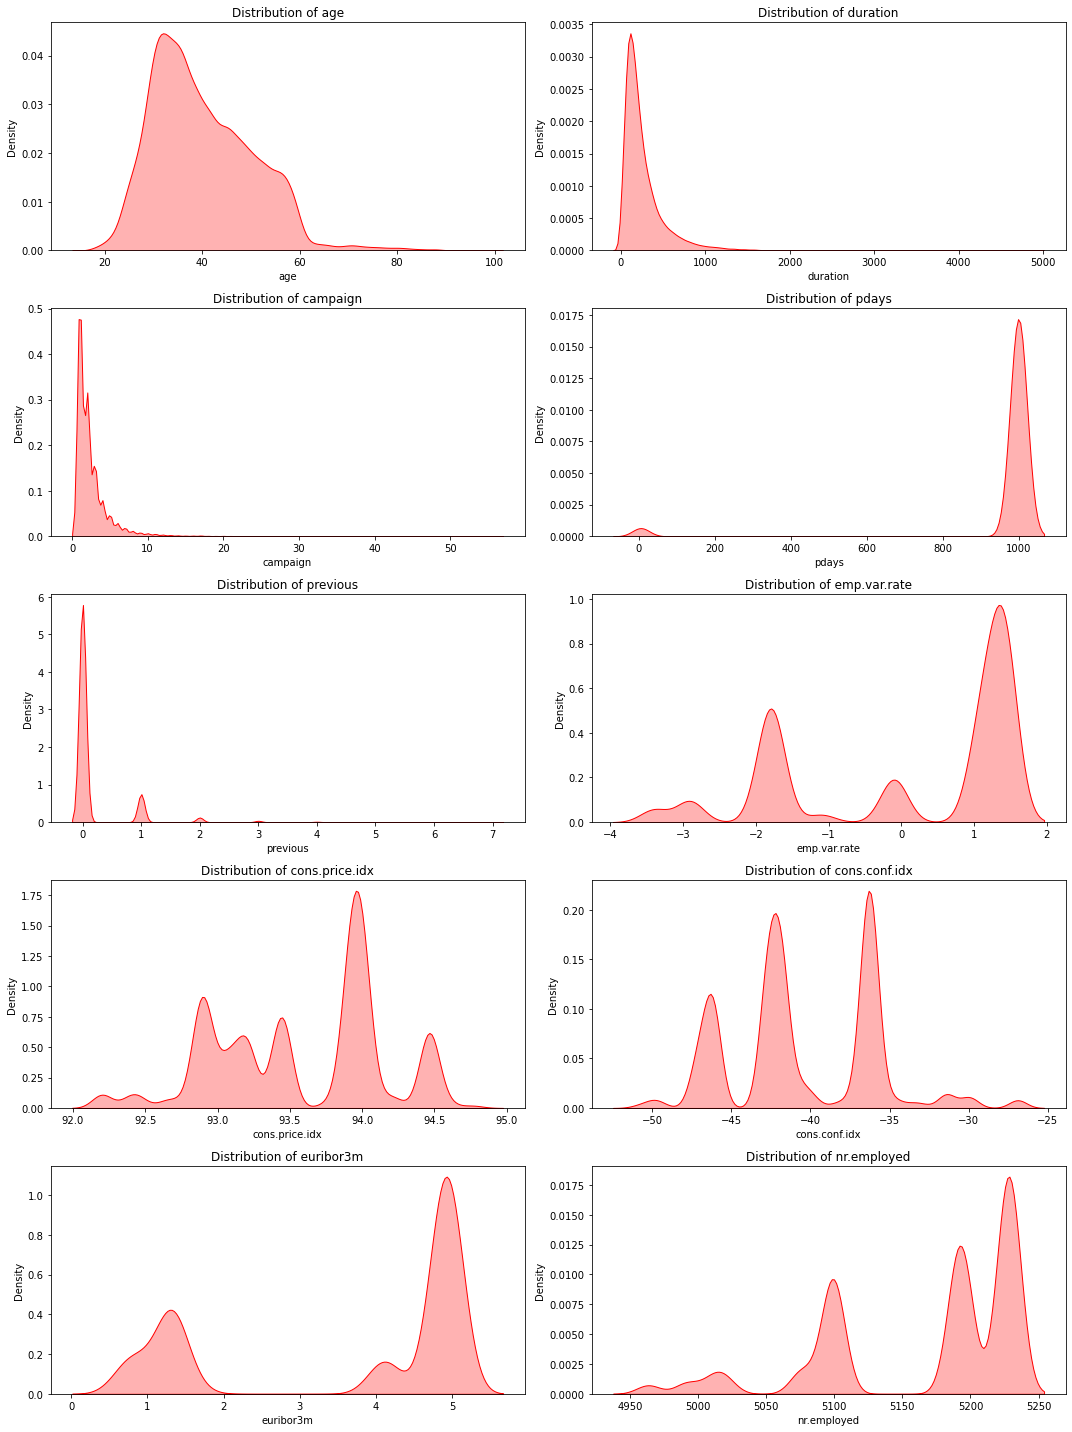

In [12]:
numeric_features = df_ref.select_dtypes(include=['float64', 'int64']).columns

# Plot Box Plot with KDE
fig, axes = plt.subplots(nrows=len(numeric_features) // 2, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.kdeplot(df_ref[feature], ax=axes[i], color='red', fill=True, alpha=0.3)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

During the intrepretation below, making use of both summary statistics and charts.

**AGE DISTRIBUTION**

- The mean of the age is approximately 40 years, indicating that, on average, the clients in the dataset are arounf 40 years old.

- The median is slightly lower than the mean, suggesting a right_skewed distribution, influenced by higher values(potential outliers)

- The standard deviation of age approximates 10.42 reflects the spread of ages around the mean. A higher standard deviation indicates a wider spread of ages, contributing to the dataset variability.

- The range of age spans from 17 to 98, showcasing a diverse age distribution.

- The IQR (Q3 - Q1) encompasses the middle 50% of the data, the central spread on the ages.

- Making use of chart, the histplot visualizes that there are potential outliers or uncommon age values that deviate significantly from the bulk distribution.

- The right-skewed shape indicated by a longer tail on the right side , suggests that there are relatively more younger individual in the data, with few older individuals contributing to the higher mean.

**DURATION DISTRIBUTION**

* The average contact duration is approximately 258 seconds, suggesting that, on average, calls last around 4.3 minutes.

* The median duration (180 seconds) is lower than the mean, indicating a right-skewed distribution with some longer calls influencing the mean.

- The standard deviation (259.31 seconds) reflects the spread of contact durations around the mean. A higher standard deviation suggests a wide range of call lengths, contributing to the dataset's variability.

- The range of contact durations spans from 0 seconds to 4918 seconds (82 minutes), showcasing a diverse distribution of call lengths.

- The interquartile range (IQR), calculated from Q1 (102 seconds) to Q3 (319 seconds), represents the middle 50% of the data. It provides insights into the central spread of call durations.

- The maximum duration of 4918 seconds may indicate potential outliers or exceptionally long calls. These outliers can significantly impact the mean and should be considered in further analysis.

- The right-skewed shape of the distribution, with a longer tail on the right side, suggests that while most calls are of shorter duration, there are some longer calls contributing to the higher mean.


**CAMPAIGN DISTRIBUTION**

- The average number of contacts per client during the campaign is approximately 2.57.

- The median (2) is close to the mean, indicating a relatively symmetric distribution.

- The standard deviation (2.77) suggests moderate variability in the number of campaign contacts.

- The range of campaign contacts spans from 1 to 56, with a concentrated distribution around lower values.

- The interquartile range (IQR), represents the middle 50% of the data and highlights the concentration of contacts within this range.

- The maximum value of 56 indicates the presence of potential outliers, suggesting a few instances with an unusually high number of campaign contacts.


**PDAYS**


- The average number of days since the last contact (pdays) is approximately 962.46 .


- The median and 74th percentile both have values of 999, indicating that a significant portion of clients was not previously contacted(999 denotes no previous contact).


- The standard deviation 186.94 suggests moderate variability in the number of days since the last contact.


- The minimum value of 0 indicates that some clients were calculated on the same day as the current campaign.

- The majority of clients have a '999' value , signifying no previous contact.This is observed as the entire range from Q1 to Q3


**PREVIOUS DISTRIBUTION**

- The average number of contacts performed before this campaign (previous) is low, with a mean of approximately 0.173 .

- All percentiles have a value 0, indicating that the majority of clients have not been previously contacted.

- The standard deviation suggests low variablity in the number of previous contacts.

- The maximum value of 7 indicates a small number of clients who had up to 7 previous contacts before the current campaign.

- The concentration of value 0 implies that the majority of clients have no recorded previous contacts.



**EMP.VAR.RATE**

- The average employment variation rate is 0.082, indicating a relatively stable employment environment on average.

- The standard deviation of 1.571 suggests moderate variabiity in employment variation rates.

- The employment variation rate ranges from a minimum of -3.4 to a maximum of 1.4 .

- The majority of values (Q1 - Q3) are distributed between -1.8 and 1.4, with a median (50th percentile) of 1.1


**CONSUMER PRICE INDEX**

- The average consumer price index is 93.576, indicating a baseline for measuring changes in the cost of living.

- The standard deviation of 0.579 suggests low variability in the consumer price index.

- The consumer price index ranges from a minimum of 92.201 to a maximum of 94.767.

- The majority of values (Q1- Q3) are distributed between 93.075 and 93.994, with a median 50th percentile of 93.479.

**CONSUMER CONFIDENCE INDEX**

- The average consumer confidence index is -40.503, providing an insight into the overall confidence or pessimism among consumer.

- The standard deviation of 4.628 indicates a moderate degree of variability in consumer confidence.

- The consumer confidence index ranges from a minimum of -50.800 to a maximum of -26.900.

- The majority of values are distributed between -42.700 and -36.400, with a median of -41.800

**EURIBOR 3-MONTH RATE** 

- The average Euribor 3-month rate (euribor3m) is 3.621, serving as a benchmark for short-term interest rates.

- The standard deviation of 1.734 indicates moderate variability in the Euribor 3-month rate.

- The range extends from a minimum of 0.634 to a maximum of 5.045.

- The interquartile range (IQR) between Q1 (1.344) and Q3 (4.961) suggests a concentration of values within this range.

- The median (50th percentile) is 4.857, reflecting the central tendency of the distribution.


**NUMBER OF EMPLOYEES**

- The average number of employees (nr.employed) is 5167.035, reflecting the central value in the distribution.

- The standard deviation of 72.251 indicates limited variability in the number of employees.

- The range extends from a minimum of 4963.600 to a maximum of 5228.100.

- The interquartile range (IQR) between Q1 (5099.100) and Q3 (5228.100) suggests a concentration of values within this range.

- The median (50th percentile) is 5191.000, indicating the central tendency of the distribution.

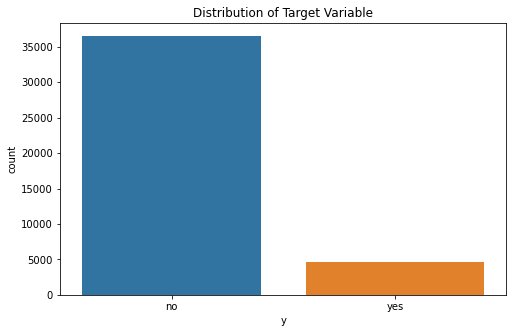

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df_ref)
plt.title('Distribution of Target Variable')
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

The target_var 'y' is of binary class with values 'no' & 'yes'


* 'no' indicating clients who  did not subscribe to a term deposit, with count 36537 making it the 'majority class' of the target variable.

This indicates that the positive outcomes are less frequent.


* On the other hand 'yes' indicating clients who subscribed to a term deposit, with count 4639 making it the 'minority class' of the dataset.

* NO = 36537 ~ 88.75 %

* YES = 4639 ~ 11.25 %

There is an clear class imbalance on the target variable.

This imbalance must be addressed because it can cause an potential bias in the model, making model challenging to predict the minority class accurately. 

Mitigating imbalance with strategies like SMOTE, adjusting class weights can help construct a robust model.

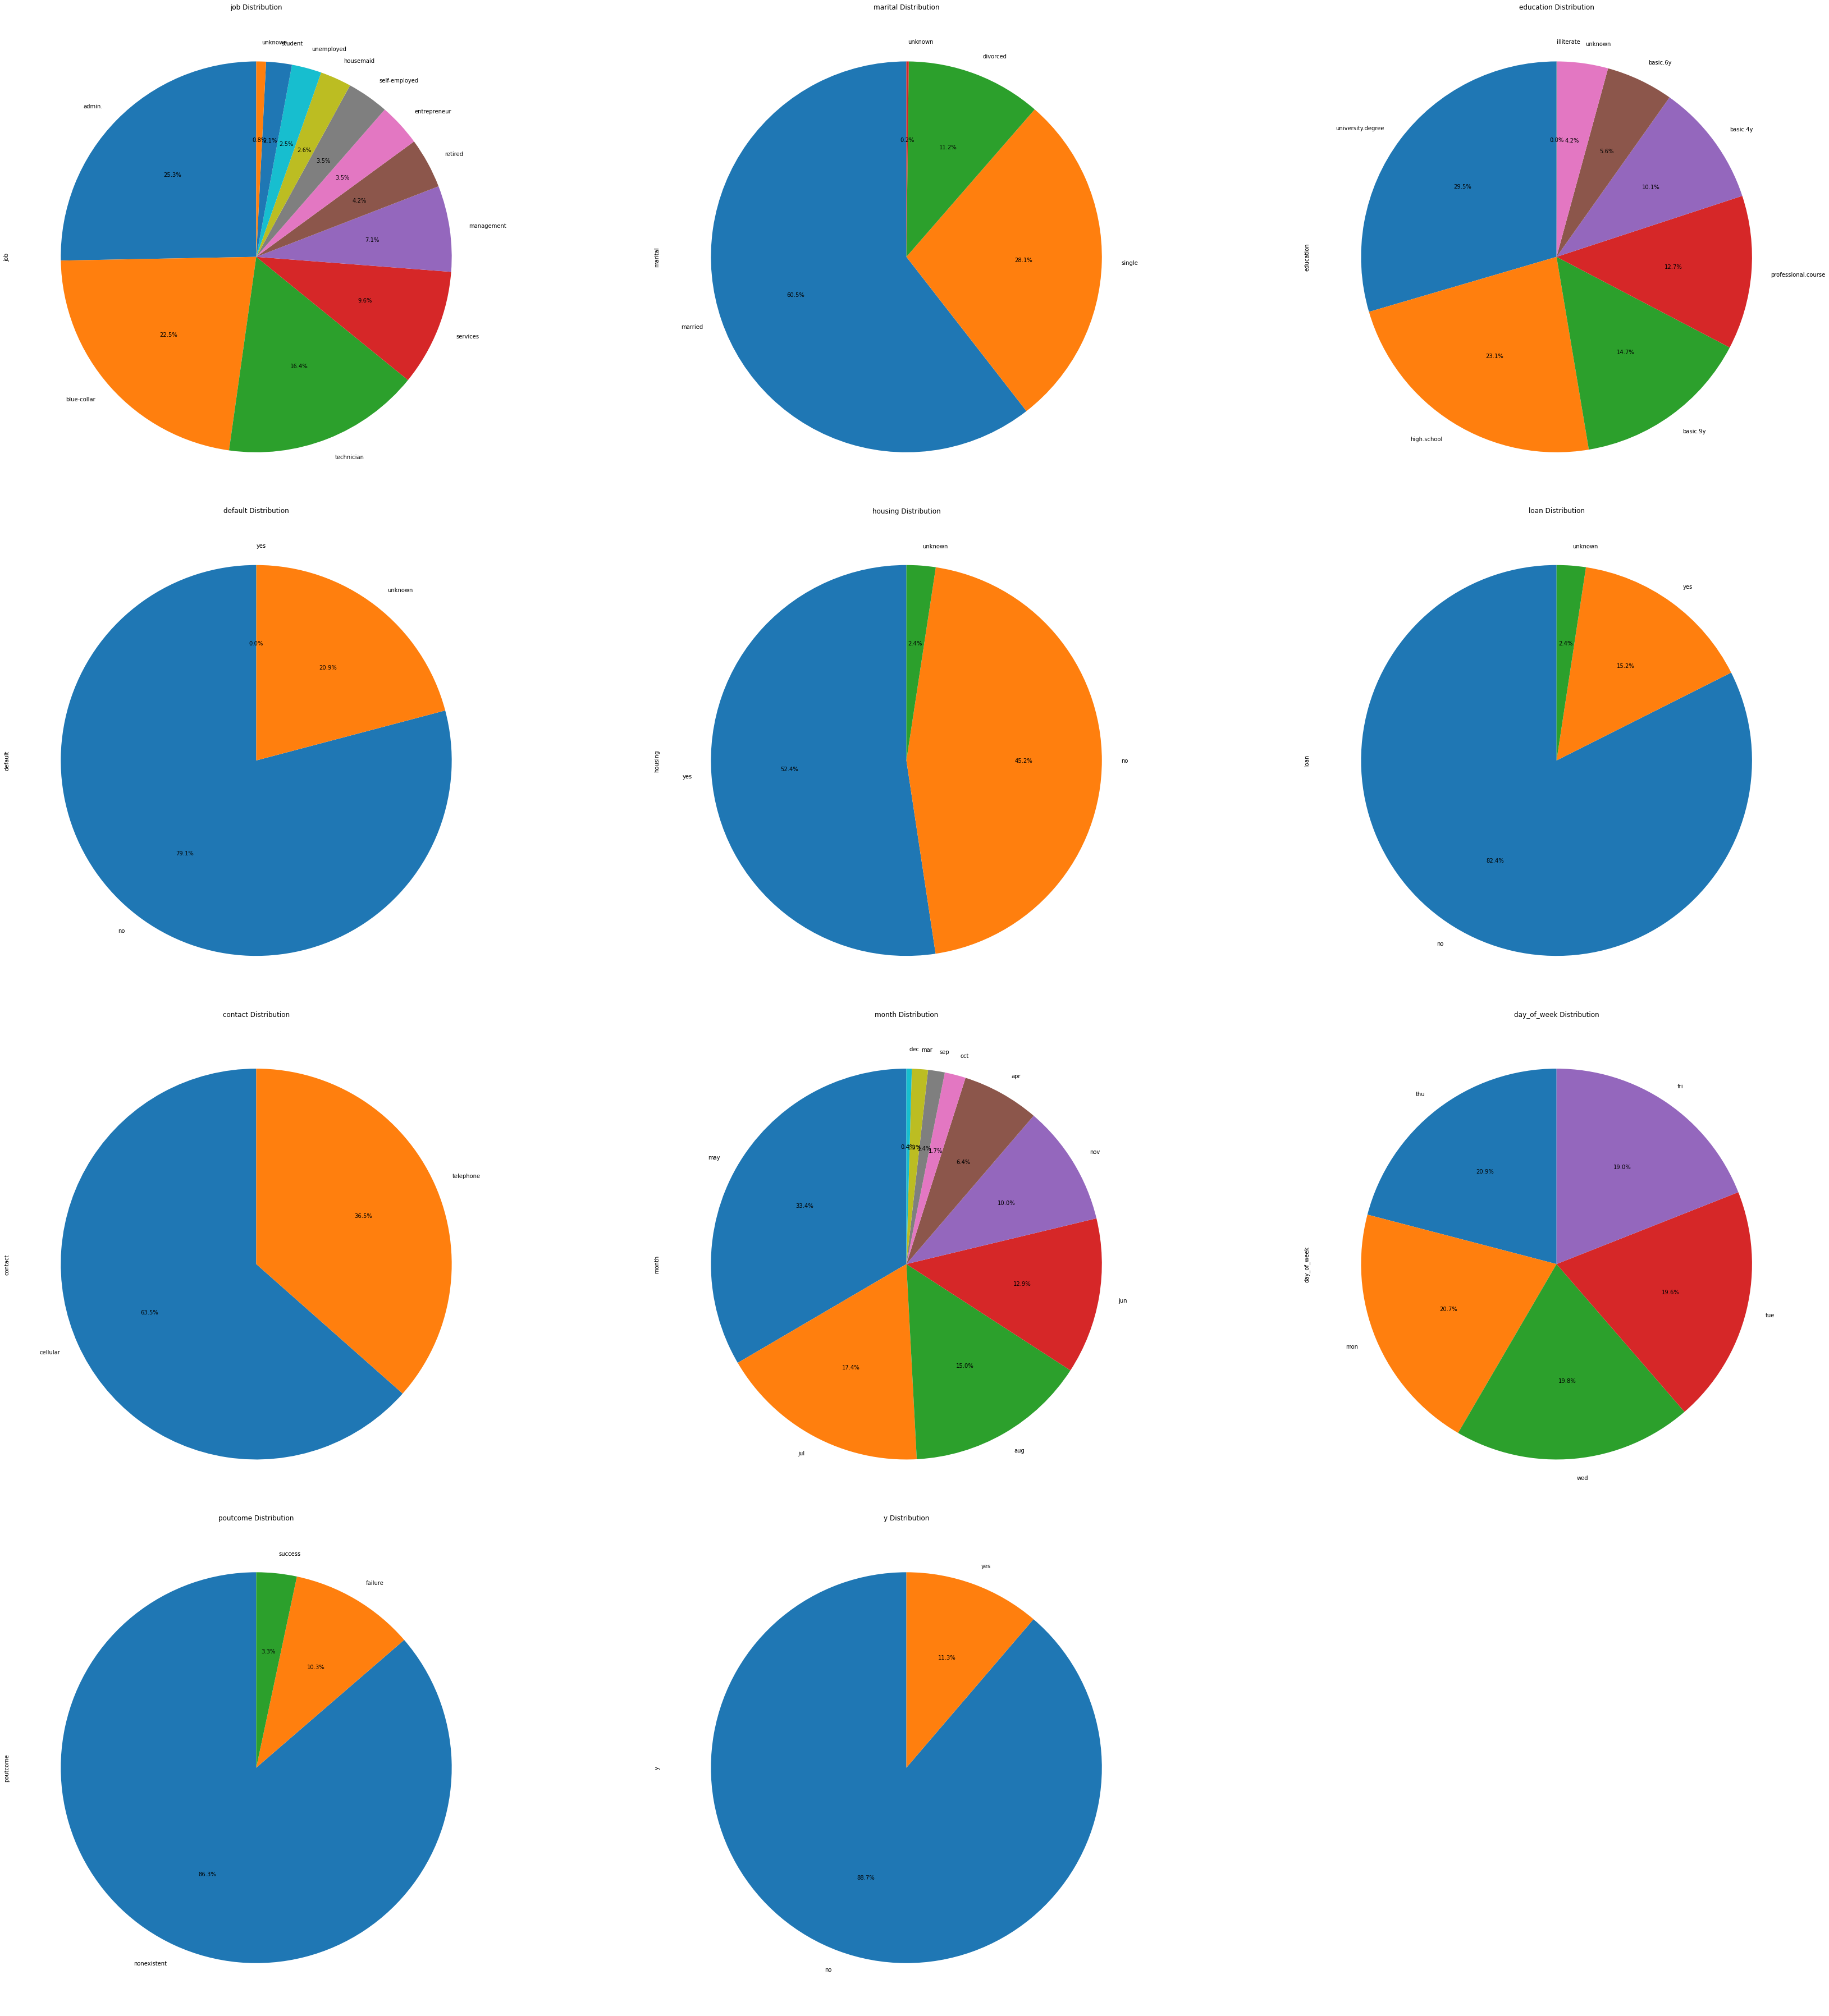

In [14]:
categorical_features = df_ref.select_dtypes(include=['object']).columns
num_subplots = len(categorical_features)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(50, 50))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    count_df = df_ref[col].value_counts()
    count_df.plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(f'{col} Distribution')

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================


**JOB DISTRIBUTION**

The Job variable provides valuable insights into the occupational composition of the dataset.This dataset exhibits a diverse range of occupations, reflecting a snapshot of the working population.

* Admin  : Approximately 25.3% of clients hold Administrative positions , making it most prevalent job category.


* Blue_collar : Blue_collar workers represent a substantial portion at 22.5%, indicating a diverse representation of manual labor occupation.


* Technician : Technician occupation accounts for 16.4% of the entire occupation. This suggests a significant presence of individuals with specialized skills.


* Service & Management Roles: Services role contributes to 9.6% and 7.1% respectively. These roles encompass a range of service-oriented and managerial positions.


* Retired Population : A notable portion 4.2% consists of retired individuals.

     **NOTE :** This demographic may have unique financial needs and considerations.


* Entrepreneurs and Self-employed : Entrepreneurs and self-employed individuals collectively make up around 6.9% highlighting the presence of business owners and independent professionals.


* Certain job categories such as 'student', 'unemployed', 'housemaid' and 'unknown' represent a smaller proportions, each comprising less than 5% of the dataset.


* Though unknown and unemployed categories contribute relatively small, they seek an warrant attention and consideration.

**Tailoring marketing strategies based on the prevalent occupations can enhance campaign effectiveness. Understanding the needs of admin, blue_collar,technician and retired allows for more targeted communications.**


**MARITAL DISTRIBUTION**

The marital status variable provides insights into the distribution of clients based on their marital status.

* married:  Approximately 60.5% of clients in the dataset are categorized as married, making it the predominant marital status.

* single : Single individuals constitute around 28.1% of the dataset. This demographic represents a substantial portion and is crucial for understanding the preference and behaviours of unmarried clients.

* divorced : Around 11.2% of clients are classified as divorced. Recognizing this segment is essential, as divorced individuals may have distinct financial and lifestyle considerations.

* unknown :  A minimal of 0.2% falls under unknown category. While this is a small proportion, it requires consideration during furthur analysis and decision making.


**EDUCATION DISTRIBUTION**

The distribution of education levels among clients provides valuable insights into the demographic composition of the dataset.

* university.degree : The majority of the clients, approximately 29.5%, holds a 'university degree, indicating prevalent presence of individuals with highest education. **This suggests a well educated client base.**


* high.school : High school graduates represent a substantial portion, accounting for 23.1% of the dataset. Recognizing this segment is vital, as it captures a diverse group with varying financial needs and preferences.


* basic.9y : Clients with 'basic.9y' education level constitute 14.7% of the dataset. This demographic may have different financial priorities and requires tailored communication strategies.


* professional.course : Approximately 12.7% of clients have completed a 'professional course.' This segment could have specific career-related financial goals that can be addressed through targeted marketing.


* basic.4y : 'Basic.4y' education level is represented by 10.1% of clients. Understanding the financial behaviors and preferences of this group is essential for effective product positioning.


* basic.6y : Clients with 'basic.6y' education level account for 5.6% of the dataset. This group may have distinct financial needs that can be addressed through tailored financial solutions.


* unknown : The 'unknown' category represents 4.2% of clients. While relatively small, this segment emphasizes the importance of robust data collection practices to enhance the accuracy of demographic information.


* illiterate : A minimal percentage (0.04%) of clients are categorized as 'illiterate.' This small but noteworthy segment may require simplified communication strategies to cater to their unique needs.


**NOTE :**

The prevalence of higher education suggests opportunities for promoting sophisticated financial products, while acknowledging the diverse educational backgrounds allows for inclusivity in marketing strategies.



**DEFAULT DISTRIBUTION**

Analyzing the distribution of default status among clients offers insights into their credit history and financial standing. 

The default variable is of with values 'no', 'yes' & 'unknown'.

* no : A significant majority, approximately 79.1% of clients, have a default status of 'no'. This indicates a prevailing trend of clients with a clean credit history and no previous defaults.


* yes : A very small percentage (0.007%) of clients have a default status of 'yes.' While this group is minimal, it represents individuals with a history of credit defaults, which may impact their financial eligibility.


* unknown: A notable proportion, 20.9% of clients, falls under the category of 'unknown' default status. While this segment lacks explicit credit history information, it requires attention and consideration during financial analysis.

Strategic Considerations:

* Targeted marketing strategies can leverage the majority of clients with 'no' default status, emphasizing financial products that reward positive credit behavior or offering incentives for maintaining a good credit history.

* Addressing clients with 'unknown' default status may involve customized communication to encourage them to provide additional information or participate in credit assessments.

* While clients with a default status of 'yes' are minimal, understanding their financial needs and providing solutions for credit repair or financial recovery may be beneficial.

**Note:**

The dominance of 'no' default status aligns with a financially responsible client base, presenting opportunities for promoting credit-related products or services.


**HOUSING DISTRIBUTION**

Examining the distribution of housing loan status among clients provides insights into their housing and financial situations.


The housing variable consists of three values 'no', 'yes' & 'unknown'.

* yes : Approximately 52.4% of clients have a housing loan ('yes'). This suggests a moderate presence of clients with financial commitments related to housing, indicating potential interest in mortgage or housing-related financial products.


* no : A significant portion, 45.2% of clients, does not have a housing loan ('no'). This sizeable segment represents individuals without housing-related financial obligations.


* unknown : A relatively small percentage (2.4%) falls under the category of 'unknown' housing loan status. While this group is a minority, acknowledging and addressing their status can contribute to a more comprehensive understanding of the client base.

**NOTE:**

The distribution reflects a balanced representation of clients with and without housing loans, offering opportunities for diversified marketing approaches.


**CONTACT DISTRIBUTION**

Analyzing the distribution of contact methods employed during telemarketing campaigns provides insights into communication preferences among clients.

The contact column has two values 'cellular' & 'Telephone'.

* cellular : The majority of clients, approximately 63.5%, prefer to be contacted via 'cellular' communication. This highlights the widespread use and preference for mobile phones as a primary contact method.

* telephone : A substantial portion, 36.5% of clients, still prefers 'telephone' communication. While less prevalent than cellular communication, this segment represents a noteworthy portion of the client base.

**NOTE : ** 
Recognizing the diversity in contact preferences allows for a multi-channel marketing approach, combining both cellular and telephone communication methods for a more comprehensive outreach strategy.


**MONTH DISTRIBUTION**

Analyzing the distribution of contact months during telemarketing campaigns provides insights into the seasonality and temporal patterns(recurring ups and downs) of client engagements. 

* may : May emerges as the peak month for client engagements, constituting approximately 33.4% of the dataset. This suggests a notable concentration of telemarketing activities during the spring season.

* jul & aug : July and August follow, representing 17.4% and 15.0%, respectively. The summer months show consistent engagement levels, aligning with the period when individuals may be more accessible and open to financial discussions.

* jun & nov : June and November contribute to 12.9% and 9.9%, respectively. The presence of telemarketing efforts during these months indicates a strategic approach to maintaining consistent communication throughout the year.

* apr, oct,sep : April, October, and September collectively account for 9.5%. These months may witness increased client engagement, potentially influenced by financial planning cycles, economic indicators, or specific marketing campaigns.

* mar & dec : March and December have a lower but noticeable engagement rate (1.3% and 0.4%, respectively). These months may be targeted for specialized campaigns, possibly linked to financial planning at the beginning or end of the year.

**NOTE:**

Understanding the monthly distribution allows for strategic planning of telemarketing campaigns, considering seasonality, client accessibility, and potential variations in financial priorities throughout the year.


**DAY_OF_WEEK**

Analyzing the distribution of contact days during telemarketing campaigns provides insights into the weekly patterns of client engagements.

* **Balanced Weekly engagement** : The distribution across days of the week is relatively balanced, with Thursday leading at 20.9%, closely followed by Monday (20.7%), Wednesday (19.8%), Tuesday (19.6%), and Friday (19.0%). This balance indicates a strategic approach to maintain consistent client interactions throughout the week.

**BIVARIATE ANALYSIS**

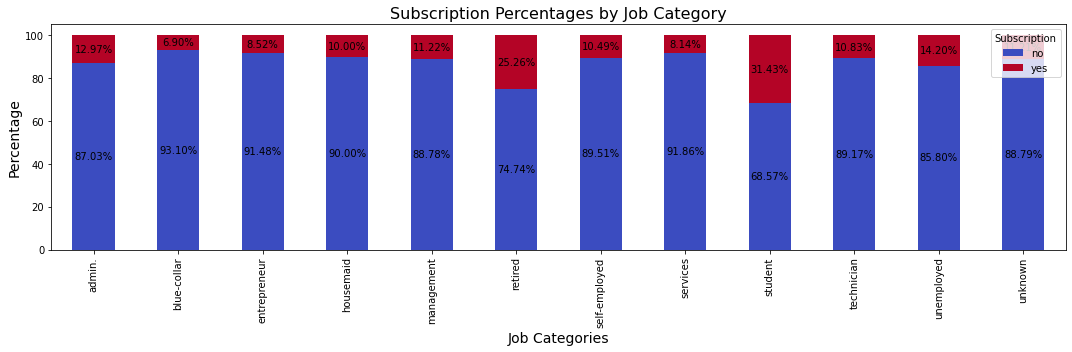

In [15]:
job_subscription_percentages = df_ref.groupby(['job', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = job_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Job Categories', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Job Category', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

**1.Admin :** 

- Subscription Rate (Yes) :  12.97%

- Majority : 87.03% admin professionals did not subscribe

- **INSIGHT :** Admin professionals show a relatively lower subscription rate, suggesting the need for tailored marketing strategies to address their specific preferences or concerns.

**2.BLUE_COLLAR :**

- Subscription Rate (Yes): 6.90%

- Majority: 93.10% of blue-collar workers did not subscribe.

- **INSIGHT :**  Blue-collar workers exhibit a lower subscription rate. Campaigns targeting this group may benefit from emphasizing benefits tailored to their financial needs and priorities.

**3.ENTREPRENEUR :** 

- Subscription Rate (Yes): 8.52%

- Majority: 91.49% of entrepreneurs did not subscribe.

- **INSIGHT :** Entrepreneurs have a lower subscription rate, indicating the importance of crafting campaigns that address the unique financial concerns and risk considerations of this group.


**4.RETIRED INDIVIDUALS :**

- Subscription Rate (Yes): 25.26%

- Majority: 74.74% of retired individuals did not subscribe.

- **INSIGHT :** Retired individuals show a higher subscription rate. Marketing efforts can focus on financial products or services catering to their post-retirement needs and goals.


**5. STUDENTS :**

- Subscription Rate (Yes): 31.43%

- Majority: 68.57% of students did not subscribe.

- **INSIGHT :** Students demonstrate a relatively higher subscription rate, possibly due to different financial priorities. Tailoring campaigns to address the unique needs of students may yield positive results.


**6.TECHNICIANS :**

- Subscription Rate (Yes): 10.83%

- Majority: 89.17% of technicians did not subscribe.

- **INSIGHT :** Technicians have a lower subscription rate, suggesting the importance of targeted communication to address their specific financial concerns or goals.


**7.UNEMPLOYED INDIVIDUALS :**

- Subscription Rate (Yes): 14.20%

- Majority: 85.80% of unemployed individuals did not subscribe.

- **INSIGHT :** Unemployed individuals exhibit a moderate subscription rate. Campaigns can focus on financial solutions or services that align with their current circumstances.


**8.UNKNOWN :**

- Subscription Rate (Yes): 11.21%

- Majority: 88.79% of individuals with unknown job categories did not subscribe.

- **INSIGHT :** While individuals with unknown job categories show a lower subscription rate, efforts can be made to gather more information for a comprehensive understanding of their financial needs.

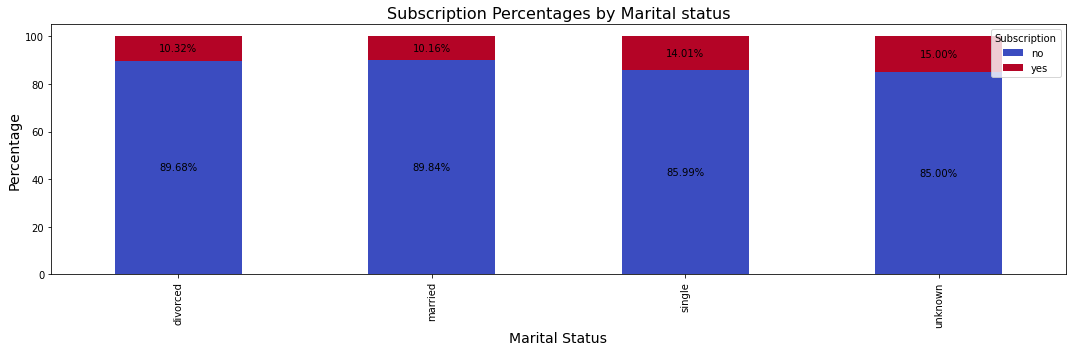

In [16]:
mart_subscription_percentages = df_ref.groupby(['marital', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = mart_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Marital Status', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Marital status', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================


**1.DIVORCED_INDIVIDUALS :**

- Subscription Rate (Yes): 10.32%

- Majority: 89.68% of divorced individuals did not subscribe.

- **INSIGHT :** Divorced individuals exhibit a lower subscription rate, emphasizing the need for campaigns addressing the distinct financial considerations or preferences of this group.


**2.MARRIED :**

- Subscription Rate (Yes): 10.16%

- Majority: 89.84% of married individuals did not subscribe.

- **INSIGHT :** Married individuals demonstrate a lower subscription rate. Tailoring marketing messages to resonate with family-oriented financial products may enhance engagement.


**3.SINGLE :**

- Subscription Rate (Yes): 14.01%

- Majority: 85.99% of single individuals did not subscribe.

- **INSIGHT :**  Singles show a relatively higher subscription rate. Crafting campaigns that appeal to the financial needs and goals of unmarried clients may yield positive results.

**4.UNKNOWN :**

- Subscription Rate (Yes): 15.00%

- Majority: 85.00% of individuals with unknown marital status did not subscribe.

- **INSIGHT :** While individuals with unknown marital status exhibit a lower subscription rate, efforts can be made to gather more information for a comprehensive understanding of their financial needs.

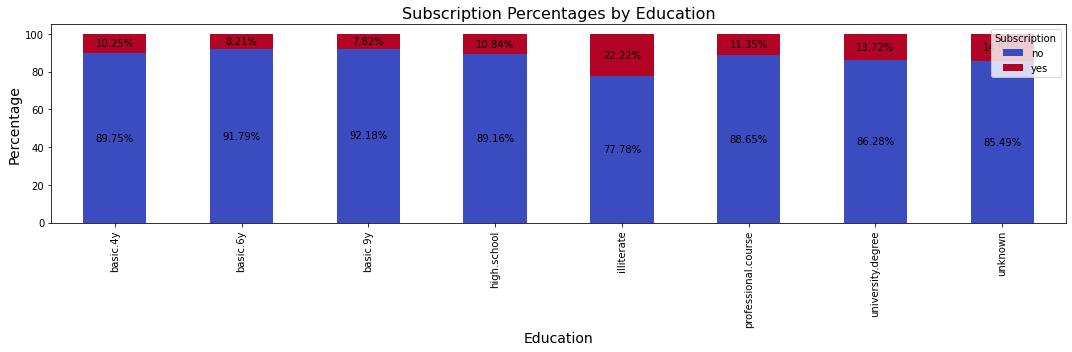

In [17]:
edu_subscription_percentages = df_ref.groupby(['education', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = edu_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Education', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================


**1.BASIC.4Y :**

- Subscription Rate (Yes): 10.28%

- Majority: 89.72% of individuals with basic.4y education did not subscribe.

- **INSIGHT :**  Individuals with basic.4y education exhibit a lower subscription rate, indicating the potential for tailored campaigns addressing their financial needs.


**2.BASIC.6Y :**

- Subscription Rate (Yes): 8.20%

- Majority: 91.80% of individuals with basic.6y education did not subscribe.

- **INSIGHT :** Clients with basic.6y education demonstrate a lower subscription rate. Tailoring communication to suit their financial priorities may enhance engagement.


**3.BASIC.9Y :**

- Subscription Rate (Yes): 7.82%

- Majority: 92.18% of individuals with basic.9y education did not subscribe.

- **INSIGHT :** A lower subscription rate is observed among clients with basic.9y education. Targeted campaigns focusing on their financial preferences may be beneficial.


**4.HIGH.SCHOOL :**

- Subscription Rate (Yes): 10.82%

- Majority: 89.18% of high school graduates did not subscribe.

- **INSIGHT :** High school graduates exhibit a lower subscription rate. Crafting campaigns tailored to their financial aspirations may improve engagement.


**5.ILLITERATE :**

- Subscription Rate (Yes): 22.22%

- Majority: 77.78% of illiterate individuals did not subscribe.

- **INSIGHT :** While a small segment, illiterate individuals show a higher subscription rate. Simplified communication strategies may enhance engagement.


**6.PROFESSIONAL_COURSE :**

- Subscription Rate (Yes): 11.36%

- Majority: 88.64% of individuals with a professional course education did not subscribe.

- **INSIGHT :**  Clients with a professional course education exhibit a moderate subscription rate. Tailored campaigns focusing on their career-related financial goals may be effective.


**7.UNIVERSITY DEGREE :**
- Subscription Rate (Yes): 13.74%

- Majority: 86.26% of individuals with a university degree did not subscribe.

- **INSIGHT :** Clients with a university degree show a relatively higher subscription rate. Opportunities exist for promoting sophisticated financial products aligned with their educational background.


**8.UNKNOWN :**

- Subscription Rate (Yes): 14.51%

- Majority: 85.49% of individuals with unknown education levels did not subscribe.

- **INSIGHT :** Individuals with unknown education levels exhibit a higher subscription rate. Efforts should be made to gather more information for a comprehensive understanding of their financial needs.

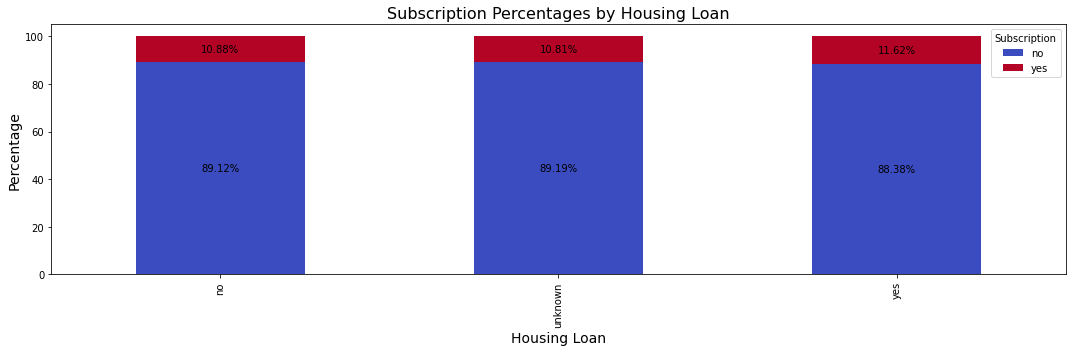

In [18]:
housing_subscription_percentages = df_ref.groupby(['housing', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = housing_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Housing Loan', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Housing Loan', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

**1.NO :**

- Subscription Rate (Yes): 10.88%

- Majority: 89.12% of clients without a housing loan did not subscribe.

- **INSIGHT :** Clients without a housing loan exhibit a moderate subscription rate. Targeted campaigns highlighting financial products unrelated to housing may be effective.

**2.YES :**

- Subscription Rate (Yes): 11.62%

- Majority: 88.38% of clients with a housing loan did not subscribe.

- **INSIGHT :** Clients with a housing loan exhibit a slightly higher subscription rate. Tailoring campaigns toward mortgage-related products or housing finance may be beneficial.

**3.UNKNOWN :**

- Subscription Rate (Yes): 10.81%

- Majority: 89.19% of clients with unknown housing loan status did not subscribe.

- **INSIGHT :** Individuals with unknown housing loan status show a similar subscription rate as those without housing loans. Encouraging clients to provide information may enhance data completeness.

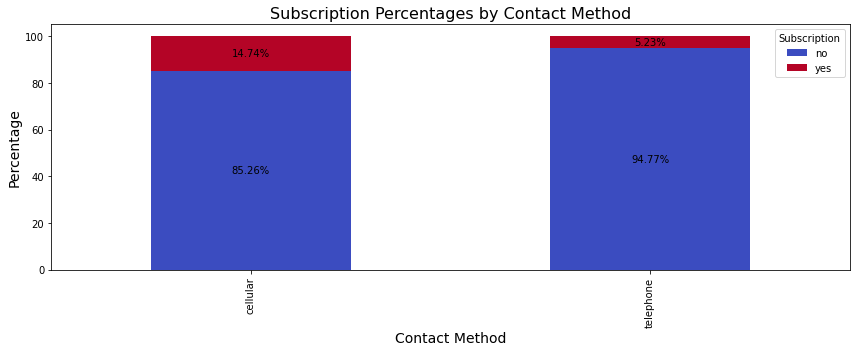

In [19]:
contact_subscription_percentages = df_ref.groupby(['contact', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = contact_subscription_percentages.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Contact Method', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Contact Method', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

**1.CELLULAR :**

- Subscription Rate (Yes): 14.74%

- Majority: 85.26% of clients contacted via cellular communication did not subscribe.

- **INSIGHT :** Cellular communication is the preferred method for the majority, but the subscription rate is relatively low. Optimization of content for mobile-friendly engagement may enhance effectiveness.


**2.TELEPHONE :**

- Subscription Rate (Yes): 5.23%

- Majority: 94.77% of clients contacted via telephone did not subscribe.

- **INSIGHT :** While less prevalent, telephone communication has a lower subscription rate. Tailoring telemarketing efforts to optimize voice-based communication content may improve results

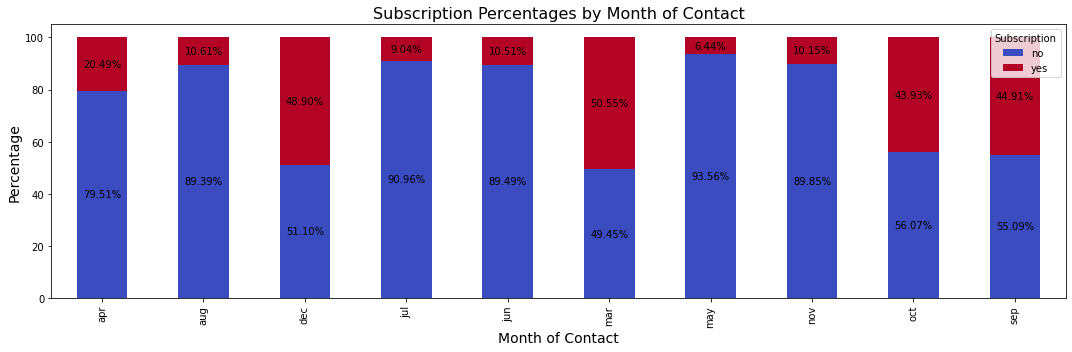

In [20]:
month_subscription_percentages = df_ref.groupby(['month', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = month_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Month of Contact', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Month of Contact', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================


**1.PEAK ENGAGEMENT MONTH - MAY :**

- Subscription Rate (Yes): 6.44%

- Majority: 93.56% of engagements in May did not result in a subscription.

- **INSIGHT :** May month stands out as the peak month for telemarketing engagements, but the subscription rate is relatively low. Targeted strategies during this period may optimize campaign effectiveness.

**2.SUMMER ENGAGEMENT MONTHS - JUL & AUG :**

- Subscription Rate (Yes): 9.04% (Jul), 10.61% (Aug)

- Majority: July (90.96%) and August (89.39%) engagements did not result in a subscription.

- **INSIGHT :** Summer months show consistent engagement levels, and crafting campaigns aligned with potential financial planning cycles during this period may enhance outcomes.


**3.WINTER ENGAGEMENT MONTHS - DEC & NOV :**

- Subscription Rate (Yes): 48.90% (Dec), 50.55% (Mar)

- Majority: December (51.10%) and March (49.45%) engagements resulted in subscriptions.

- **INSIGHT :**  These months have a higher subscription rate, possibly linked to year-end financial planning (Dec) and the beginning of the year (Mar).

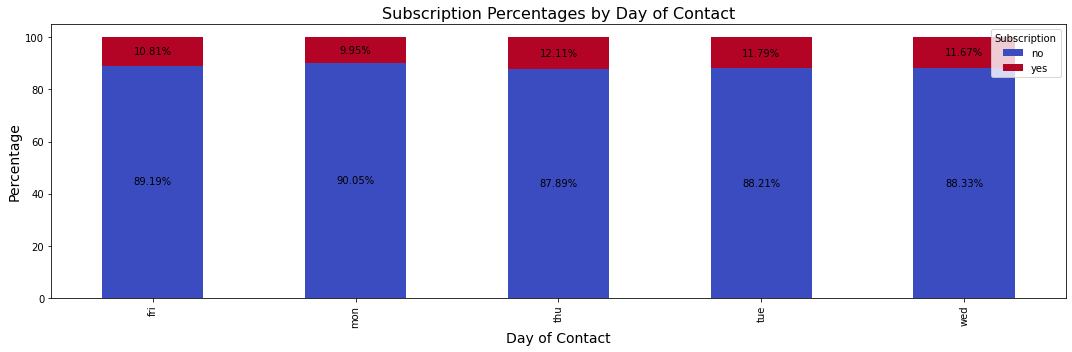

In [21]:
weekday_subscription_percentages = df_ref.groupby(['day_of_week', 'y']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1) * 100

# Plotting the stacked bar chart with 'Set2' colormap
ax = weekday_subscription_percentages.plot(kind='bar', stacked=True, figsize=(15, 5), colormap='coolwarm')

# Adding labels and title
ax.set_xlabel('Day of Contact', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Subscription Percentages by Day of Contact', fontsize=16)
ax.legend(title='Subscription', loc='upper right')

# Display the percentage values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

=========================================================================================================================== 
                                                   
                                                   INTERPRETATION

===========================================================================================================================

**BALANCED WEEKLY ENGAGEMENT :**

- Majority: Engagements across all weekdays are relatively balanced, with Friday having a slightly higher engagement rate.

- **INSIGHT :** Telemarketing efforts are well-distributed, ensuring consistent client interactions throughout the workweek.

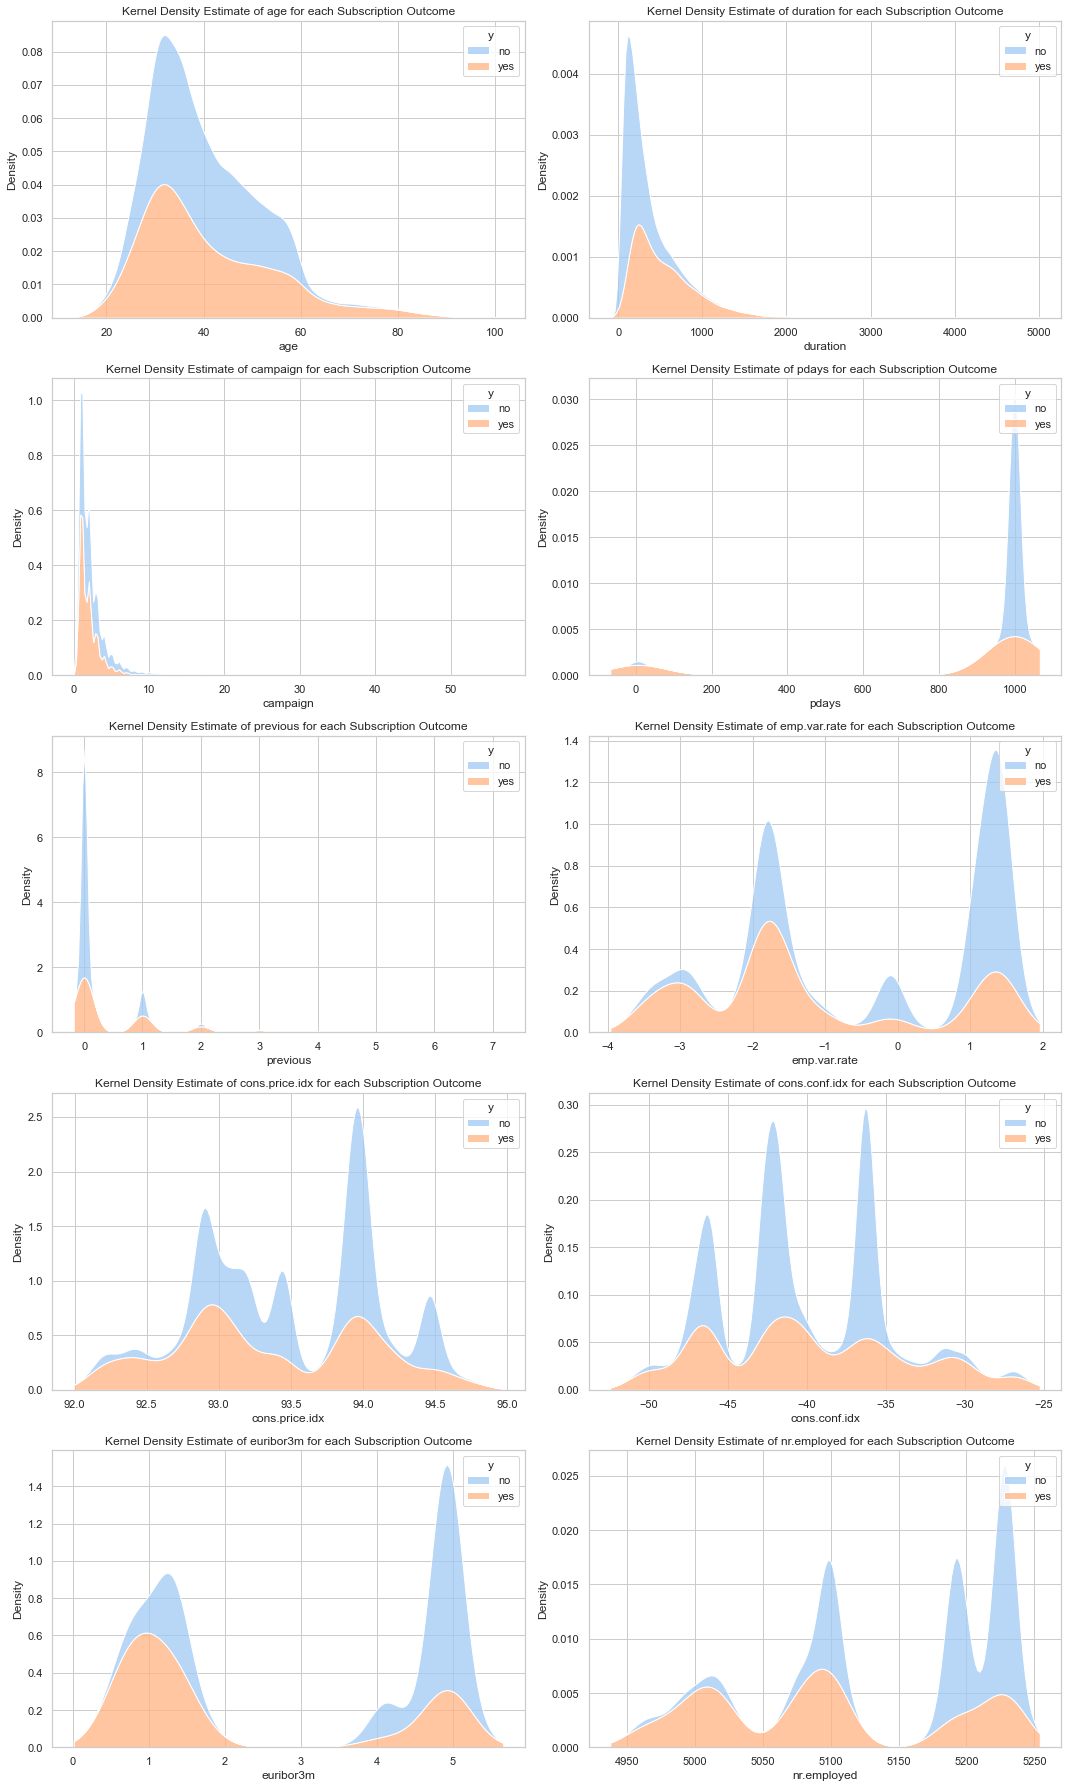

In [22]:
numerical_columns = df_ref.select_dtypes(include=['int64', 'float64']).columns
sns.set(style="whitegrid")
num_rows = len(numerical_columns)//2
num_cols = 2 
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, num_cols)
    sns.kdeplot(data=df_ref, x=column, hue='y', fill=True, common_norm=False, multiple="stack", ax=axes[row, col], palette="pastel")
    axes[row, col].set_title(f'Kernel Density Estimate of {column} for each Subscription Outcome')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()

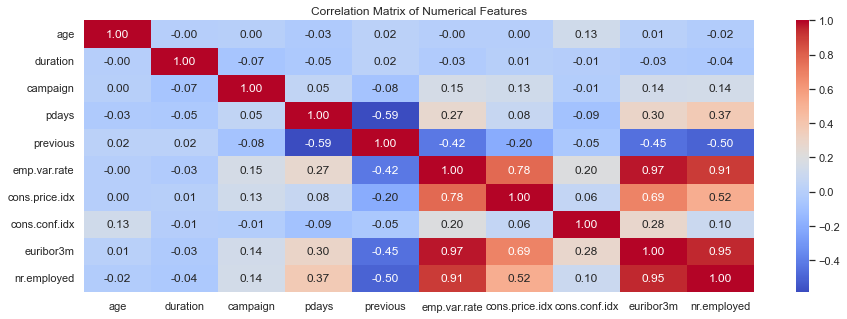

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df_ref.corr(),annot = True,cmap = 'coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

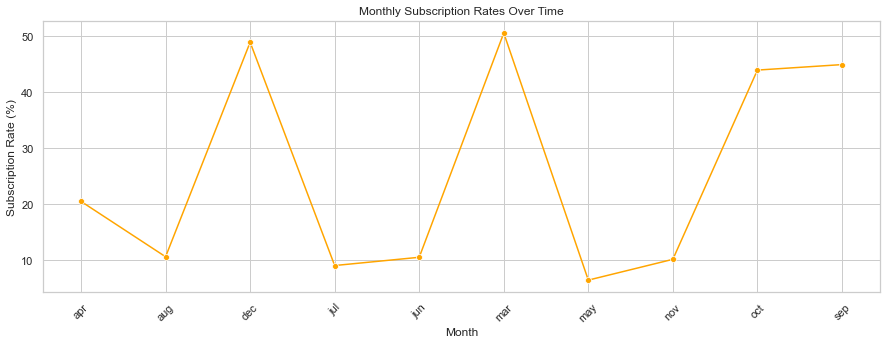

In [24]:
plt.figure(figsize=(15,5))
monthly_counts = df_ref.groupby(['month', 'y']).size().unstack(fill_value=0)
monthly_rates = monthly_counts['yes'] / (monthly_counts['yes'] + monthly_counts['no']) * 100

sns.lineplot(x=monthly_rates.index, y=monthly_rates.values, marker='o', color='orange')
plt.title('Monthly Subscription Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()

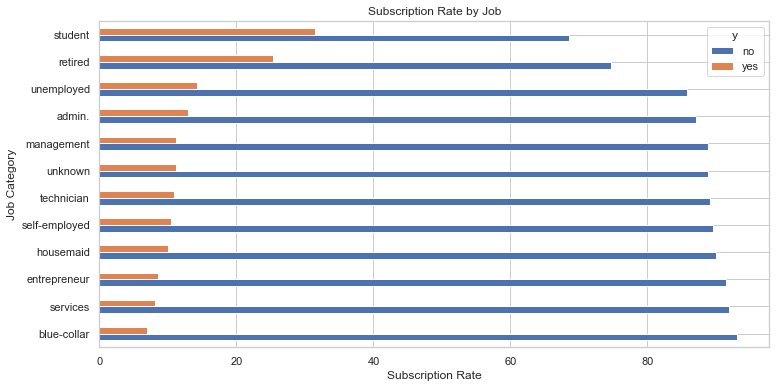

In [25]:
plt.rcParams['figure.figsize']=[15,5]
count_job_response_pct = pd.crosstab(df_ref['y'],df_ref['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct.sort_values(by='yes',ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
plt.show()

<center>  <h2>DATA PREPARATION</h2> </center>

**1.MISSING VALUE ANALYSIS**

In [26]:
# missing value analysis

df_ref.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [27]:
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])

# Iterate through columns and collect unique values
for column in df_ref.select_dtypes(exclude=np.number).columns:
    unique_values = df_ref[column].unique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)

# Display the tabulated unique value
unique_values_df

,Column,Unique_Values
0,job,"[housemaid, services, admin., blue-collar, tec..."
1,marital,"[married, single, divorced, unknown]"
2,education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
3,default,"[no, unknown, yes]"
4,housing,"[no, yes, unknown]"
5,loan,"[no, yes, unknown]"
6,contact,"[telephone, cellular]"
7,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
8,day_of_week,"[mon, tue, wed, thu, fri]"
9,poutcome,"[nonexistent, failure, success]"


In [28]:
# found an inappropriate value called "unknown" which might be an missing value or to be considered so,

# checking for the persence of that particular value in all categorical columns

unknown_cols = []

value='unknown'

for i in df_ref.select_dtypes(exclude=np.number).columns:
    if value in df_ref[i].values:
        unknown_cols.append(i)

# since the above categorical columns has "unknown" value in it, counting the no.of of unknown value in all cat.columns

unknown_counts={}
for i in unknown_cols:
    count = (df_ref[i] == value).sum()
    unknown_counts[i] = count
    
# calculating the percentage of "unknown" value in all cat.columns
df_unknown = pd.DataFrame()
df_unknown["unknown_count"] = unknown_counts.values()
df_unknown.index = unknown_counts.keys()
df_unknown["unknown_percent"] = df_unknown['unknown_count'] / len(df_ref) * 100
    
print(f"There is an inappropriate value in {unknown_cols}")

df_unknown.sort_values(by = "unknown_count",ascending = False)

There is an inappropriate value in ['job', 'marital', 'education', 'default', 'housing', 'loan']


,unknown_count,unknown_percent
default,8596,20.876239
education,1730,4.201477
housing,990,2.404313
loan,990,2.404313
job,330,0.801438
marital,80,0.194288


In [29]:
df_ref['marital'] = df_ref['marital'].replace('unknown', df_ref['marital'].mode().iloc[0])
df_ref['job'] = df_ref['job'].replace('unknown', df_ref['job'].mode().iloc[0])
df_ref['housing'] = df_ref['housing'].replace('unknown', df_ref['housing'].mode().iloc[0])
df_ref['loan'] = df_ref['loan'].replace('unknown', df_ref['loan'].mode().iloc[0])

In [30]:
df_ref.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**2.OUTLIER ANALYSIS AND TREATMENT**

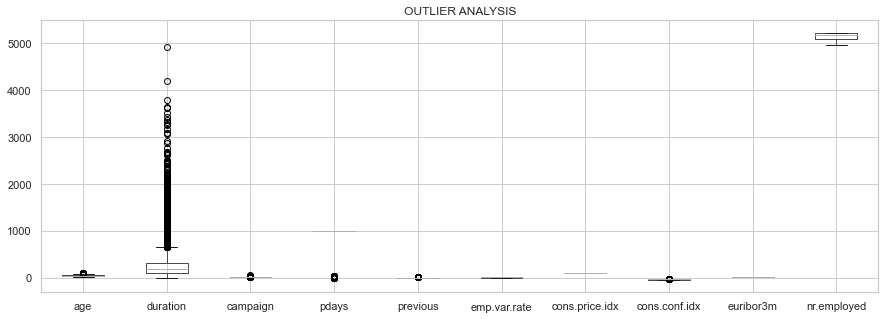

In [31]:
plt.figure(figsize =(15,5))
df_ref.boxplot()
plt.title('OUTLIER ANALYSIS')
plt.show()

In [32]:
df_ref['pdays'] = df_ref['pdays'].replace(999,-1)

In [33]:
Q1 = df_ref.quantile(0.25)
Q3 = df_ref.quantile(0.75)

IQR = Q3 - Q1

df_out = df_ref[((df_ref >(Q3+1.5*IQR))|((df_ref<(Q1-1.5*IQR)))).any(axis=1)].shape
print(f"The outliers of count of the dataset is : {df_out[0]} ")

The outliers of count of the dataset is : 10827 


In [34]:
df_out_index = df_ref[(df_ref['duration']>4000)|(df_ref['duration']==0)].index
df_out_index

Int64Index([6251, 22192, 23031, 24091, 28063, 33015], dtype='int64')

In [35]:
df_ref = df_ref.drop(df_ref[(df_ref['duration'] > 4000) | (df_ref['duration'] == 0)].index)
df_ref.shape

(41170, 21)

In [36]:
sqrt_duration = np.sqrt(df_ref['duration'])

In [37]:
df_ref = df_ref.drop('duration',axis=1)
df_ref.insert(1,'sqrt_duration',sqrt_duration)
df_ref.head()

,age,sqrt_duration,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,16.155494,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,12.206556,services,married,high.school,unknown,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,15.033296,services,married,high.school,no,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,12.288206,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,17.521415,services,married,high.school,no,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
Q1 = df_ref.quantile(0.25)
Q3 = df_ref.quantile(0.75)

IQR = Q3 - Q1

df_out = df_ref[((df_ref >(Q3+1.5*IQR))|((df_ref<(Q1-1.5*IQR)))).any(axis=1)].shape
print(f"The outliers of count of the dataset is : {df_out[0]} ")

The outliers of count of the dataset is : 9573 


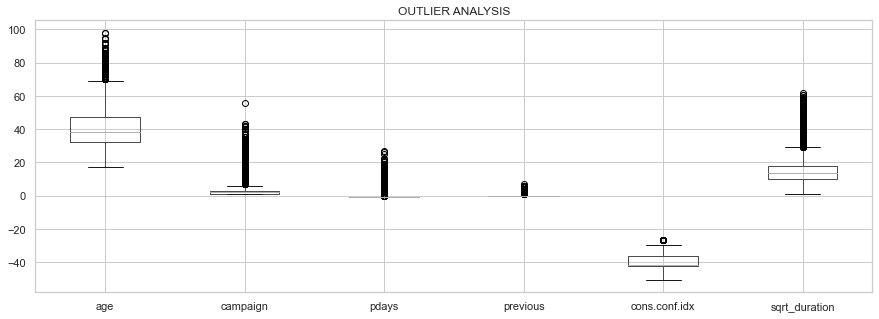

In [39]:
plt.figure(figsize =(15,5))
df_ref[['age','campaign','pdays','previous','cons.conf.idx','sqrt_duration']].boxplot()
plt.title('OUTLIER ANALYSIS')
plt.show()

In [40]:
Q1 = df_ref.quantile(0.25)
Q3 = df_ref.quantile(0.75)

IQR = Q3 - Q1


df_ref = df_ref[~((df_ref >(Q3+1.5*IQR))|((df_ref<(Q1-1.5*IQR)))).any(axis=1)]
df_ref.shape

(31597, 21)

In [41]:
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])
 
# Iterate through columns and collect unique values
for column in df_ref.columns:
    unique_values = df_ref[column].nunique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)

# Display the tabulated unique value
unique_values_df

,Column,Unique_Values
0,age,52
1,sqrt_duration,869
2,job,11
3,marital,3
4,education,8
5,default,3
6,housing,2
7,loan,2
8,contact,2
9,month,10


In [42]:
df_ref = df_ref.drop(['pdays','poutcome','previous'],axis=1)
df_ref.shape

(31597, 18)

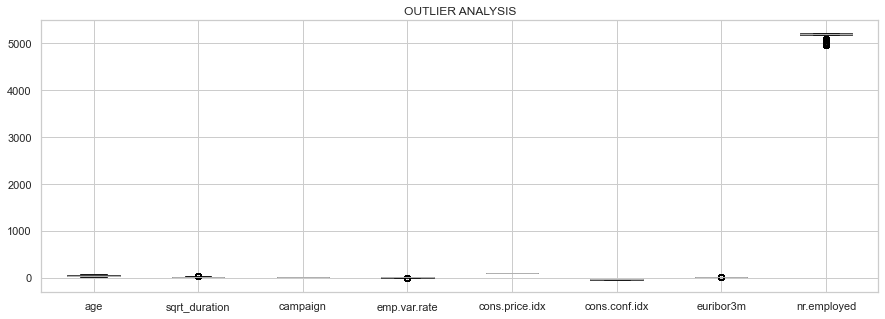

In [43]:
plt.figure(figsize =(15,5))
df_ref.boxplot()
plt.title('OUTLIER ANALYSIS')
plt.show()

In [44]:
df_ref['y'] = df_ref['y'].replace({'yes':1,'no':0})
X = df_ref.drop('y',axis=1)
y = df_ref['y']

In [45]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(exclude=np.number)

In [46]:
x_cat_encod = pd.get_dummies(X_cat,drop_first=True)

In [47]:
X_ref = pd.concat([X_num,x_cat_encod],axis=1)

In [48]:
X_ref.head()

,age,sqrt_duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,16.155494,1,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,57,12.206556,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,37,15.033296,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,12.288206,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,56,17.521415,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [49]:
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
7,nr.employed,156510.055413
4,cons.price.idx,119174.944720
6,euribor3m,1405.033400
5,cons.conf.idx,879.916465
3,emp.var.rate,122.477793
0,age,27.333851
32,month_aug,15.199223
37,month_may,9.903761
1,sqrt_duration,7.909953
34,month_jul,7.039503


In [50]:
X_ref = X_ref.drop('nr.employed',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
4,cons.price.idx,1103.997208
5,cons.conf.idx,362.089298
6,euribor3m,356.442971
3,emp.var.rate,46.474700
0,age,27.328415
36,month_may,9.310994
31,month_aug,8.489825
1,sqrt_duration,7.909611
33,month_jul,6.796606
17,marital_married,6.727945


In [51]:
X_ref = X_ref.drop('cons.price.idx',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
5,euribor3m,153.603861
4,cons.conf.idx,83.564716
0,age,26.187205
3,emp.var.rate,22.092764
35,month_may,8.362689
1,sqrt_duration,7.748452
16,marital_married,6.669863
32,month_jul,6.466314
30,month_aug,6.016649
23,education_university.degree,5.801461


In [52]:
X_ref = X_ref.drop('euribor3m',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
4,cons.conf.idx,58.964276
0,age,24.618970
34,month_may,7.582248
1,sqrt_duration,7.567034
15,marital_married,6.558129
31,month_jul,5.788972
22,education_university.degree,5.640172


In [53]:
X_ref = X_ref.drop('cons.conf.idx',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
0,age,17.653964
1,sqrt_duration,7.199451
33,month_may,7.176777
14,marital_married,6.025569
30,month_jul,5.254161


In [54]:
X_ref = X_ref.drop('age',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
0,sqrt_duration,6.825271
32,month_may,6.612978
13,marital_married,5.916585


In [55]:
X_ref = X_ref.drop('sqrt_duration',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
31,month_may,6.342577
12,marital_married,5.802937


In [56]:
X_ref = X_ref.drop('month_may',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF
12,marital_married,5.488061


In [57]:
X_ref = X_ref.drop('marital_married',axis=1)
vif = pd.DataFrame()
vif["Variable"] = X_ref.columns
vif["VIF"] = [variance_inflation_factor(X_ref.values, i) for i in range(X_ref.shape[1])]
vif[vif['VIF']>5].sort_values(by='VIF',ascending=False)

,Variable,VIF


In [58]:
vif

,Variable,VIF
0,campaign,3.355244
1,emp.var.rate,2.449324
2,job_blue-collar,2.386635
3,job_entrepreneur,1.135564
4,job_housemaid,1.115704
5,job_management,1.285294
6,job_retired,1.130754
7,job_self-employed,1.130131
8,job_services,1.486962
9,job_student,1.132474


In [59]:
# since, target variable has class imbalance, SMOTE technique is used to replicate the minority class  
sampling_strategy = 1.0  
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_res, y_res = smote.fit_resample(X_ref, y)

In [60]:
X_res.shape

(58852, 37)

In [61]:
y_res.shape

(58852,)

In [62]:
y_res.value_counts()

0    29426
1    29426
Name: y, dtype: int64

<center>  <h3>TRAIN TEST SPLIT</h3> </center>

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(X_res,y_res , test_size = 0.3, random_state = 100)
print(f"Xtrain.shape : {xtrain.shape}\nYtrain.shape : {ytrain.shape}\nXtest.shape : {xtest.shape}\nYtest.shape :{ytest.shape}")

Xtrain.shape : (41196, 37)
Ytrain.shape : (41196,)
Xtest.shape : (17656, 37)
Ytest.shape :(17656,)


In [64]:
xtrain.head()

,campaign,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
30868,2,-3.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
35162,1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
16832,3,1.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12954,4,1.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
532,2,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
xtrain_num = xtrain[['campaign','emp.var.rate']]
xtest_num = xtest[['campaign','emp.var.rate']]
xtrain_num.head()

,campaign,emp.var.rate
30868,2,-3.0
35162,1,-0.1
16832,3,1.4
12954,4,1.4
532,2,1.1


In [66]:
sc=StandardScaler()
xtr_num = sc.fit_transform(xtrain_num)
xtrain_sc = pd.DataFrame(xtr_num,columns = xtrain_num.columns,index = xtrain_num.index)
xtrain_sc.head()

,campaign,emp.var.rate
30868,0.069727,-1.620224
35162,-0.745624,0.108613
16832,0.885079,1.002839
12954,1.700430,1.002839
532,0.069727,0.823993


In [67]:
xts_num = sc.transform(xtest_num)
xts_sc = pd.DataFrame(xts_num,columns = xtest_num.columns,index = xtest_num.index)
xts_sc.head()

,campaign,emp.var.rate
36523,0.069727,-0.904844
9799,0.885079,1.002839
52030,-0.745624,1.002839
35026,-0.745624,-0.904844
27877,1.700430,-0.904844


In [68]:
vif = pd.DataFrame()
vif["Variable"] = xtrain.columns
vif["VIF"] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif[vif['VIF']>5]

,Variable,VIF


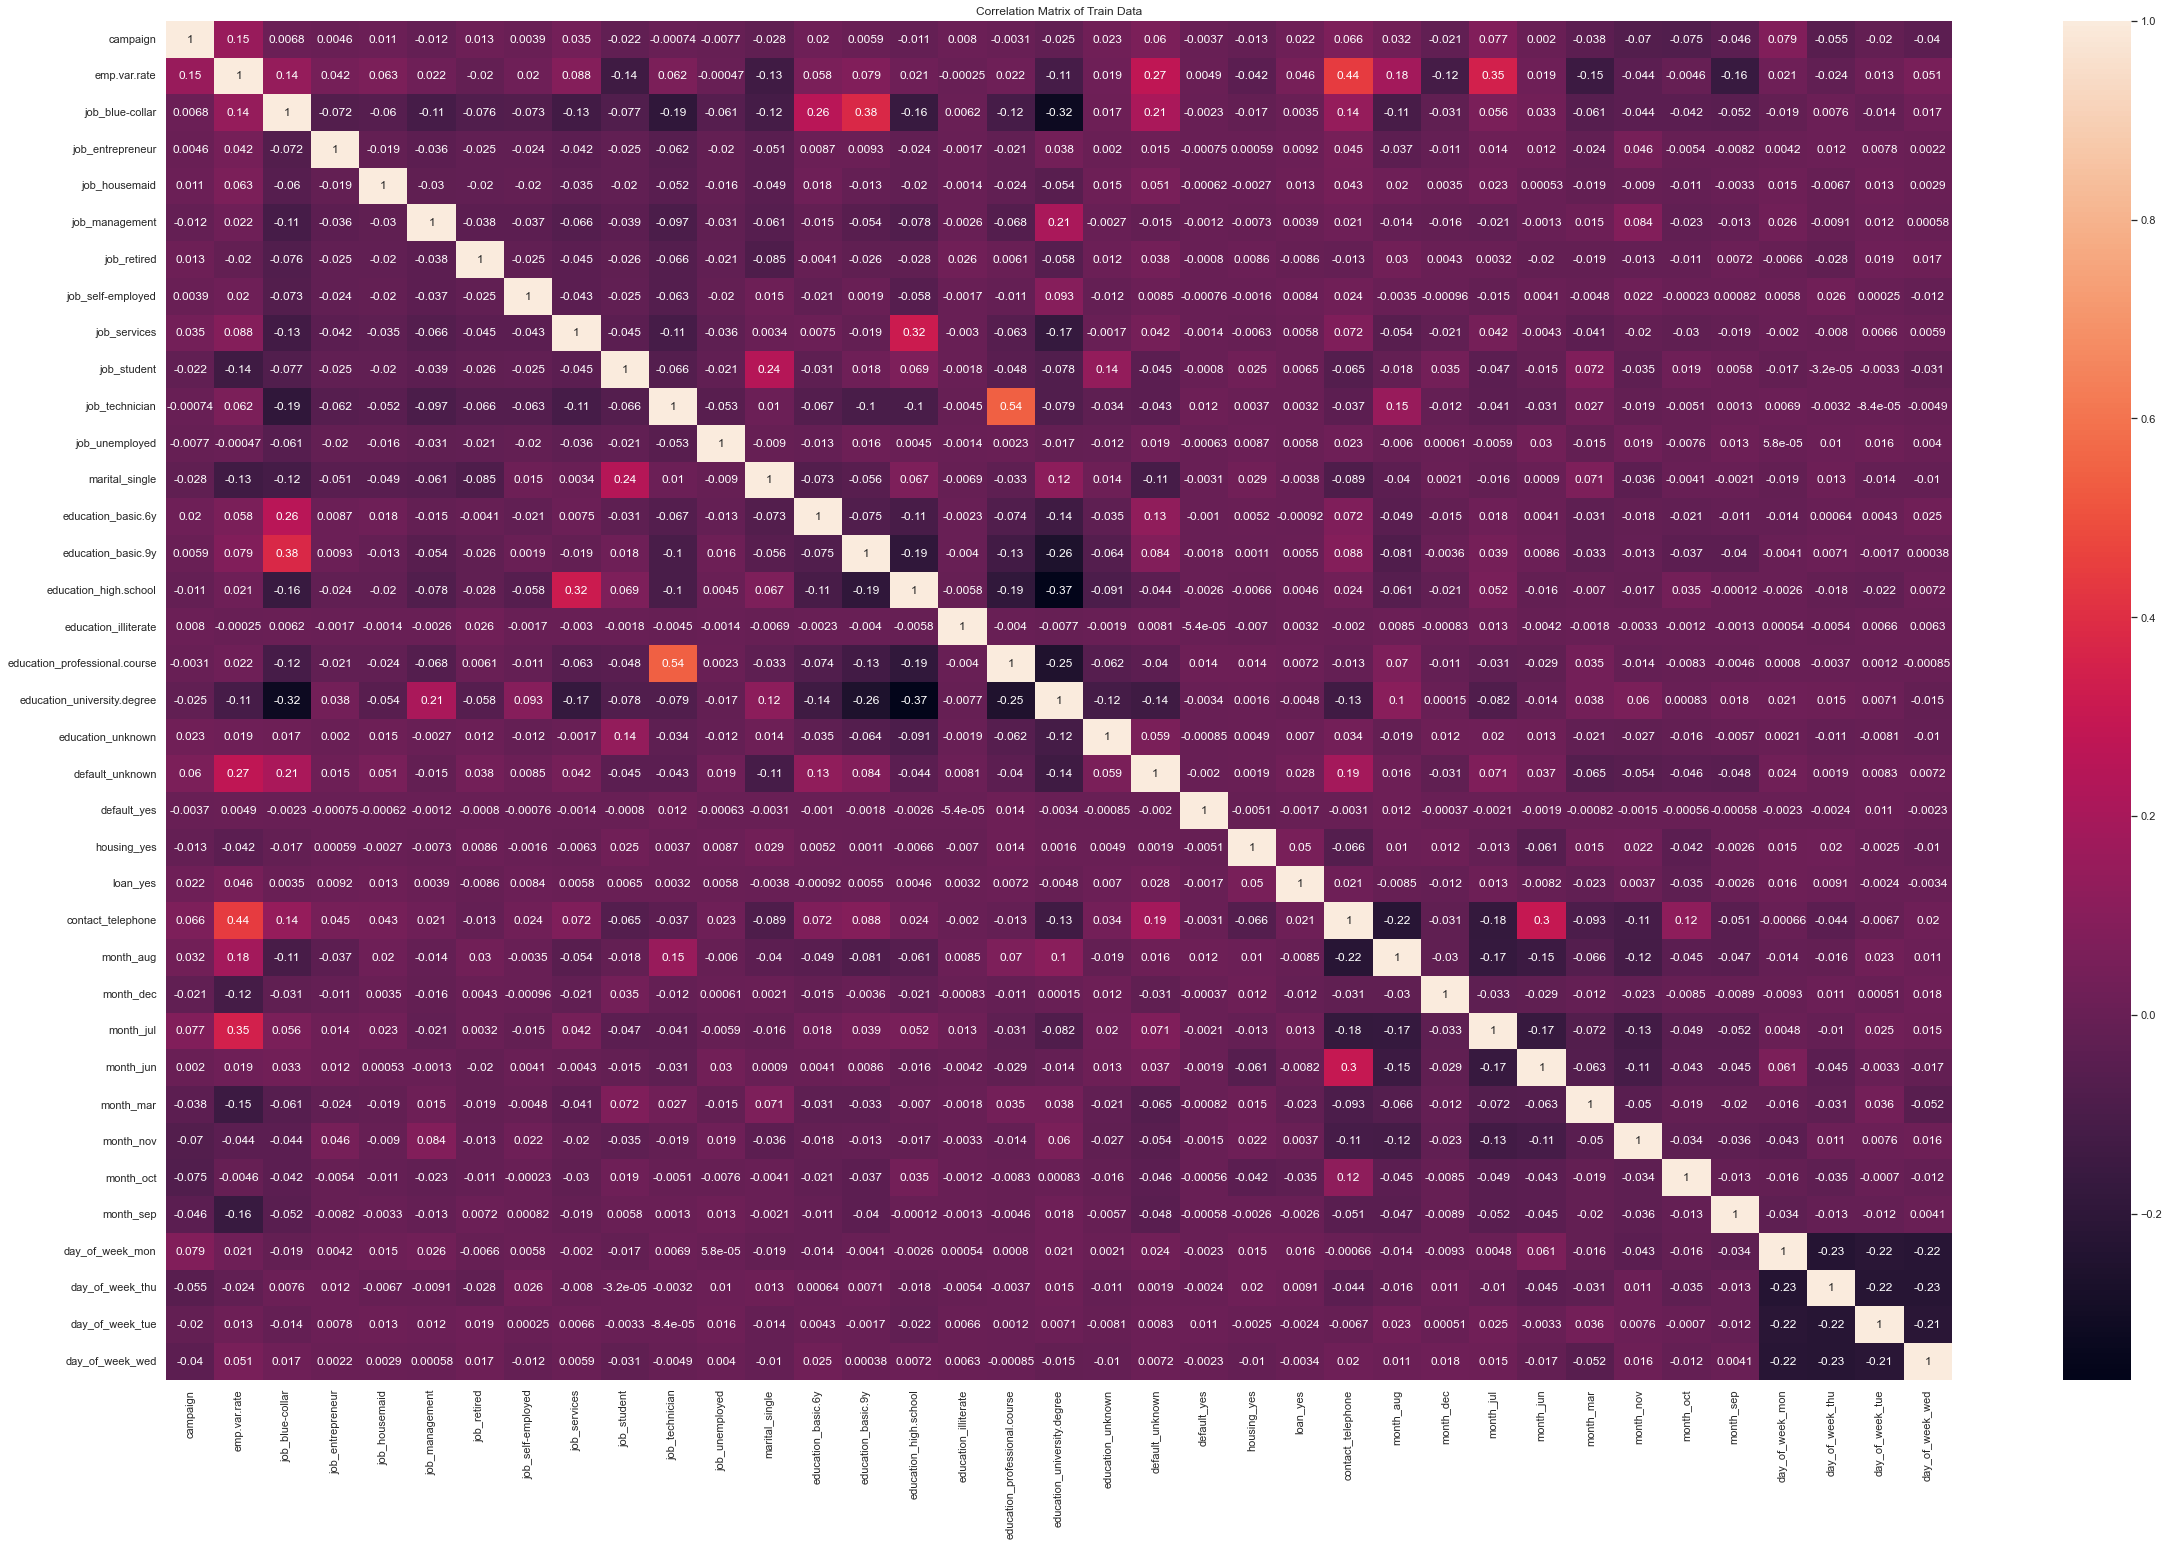

In [69]:
plt.figure(figsize=(40,25))
sns.heatmap(xtrain.corr(),annot=True)
plt.title('Correlation Matrix of Train Data')
plt.show()

<center>  <h4>MODEL BUILDING</h4> </center>

In [70]:
xtrain_stat = xtrain.copy()
xtrain_stat_ac = sm.add_constant(xtrain_stat) 

In [71]:
xtrain_stat_ac.head()

,const,campaign,emp.var.rate,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
30868,1.0,2,-3.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
35162,1.0,1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
16832,1.0,3,1.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12954,1.0,4,1.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
532,1.0,2,1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
lr_stat = sm.Logit(ytrain,xtrain_stat_ac).fit(solver='bfgs',maxiter=1000)
lr_stat.summary()

Optimization terminated successfully.
         Current function value: 0.435489
         Iterations 598


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41196
Model:                          Logit   Df Residuals:                    41158
Method:                           MLE   Df Model:                           37
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.3717
Time:                        08:08:50   Log-Likelihood:                -17940.
converged:                       True   LL-Null:                       -28555.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             5.0948      0.075     67.635      0.000       4.947       5.242
campaign                         -0.2395      0.011    -21.013      0.000      -0.262      -0.217
emp.var.rate                     -0.3605      0.012    -29.036      0.000      -0.385      -0.336
job_blue-collar                  -1.9058      0.048    -39.503      0.000      -2.000      -1.811
job_entrepreneur                 -2.4326      0.104    -23.459      0.000      -2.636      -2.229
job_housemaid                    -3.3157      0.143    -23.129      0.000      -3.597      -3.035
job_management                   -1.5926      0.060    -26.394      0.000      -1.711      -1.474
job_retired                      -1.9474      0.088    -22.035      0.000      -2.121      -1.774
job_self-employed                -2.0499      0.092    -22.289      0.000      -2.230      -1.870
job_services                     -1.5351      0.056    -27.327      0.000      -1.645      -1.425
job_student                      -0.3884      0.093     -4.179      0.000      -0.570      -0.206
job_technician                   -1.2145      0.047    -25.870      0.000      -1.306      -1.122
job_unemployed                   -2.3352      0.120    -19.471      0.000      -2.570      -2.100
marital_single                   -0.4876      0.032    -15.468      0.000      -0.549      -0.426
education_basic.6y               -1.7745      0.079    -22.485      0.000      -1.929      -1.620
education_basic.9y               -1.7065      0.054    -31.496      0.000      -1.813      -1.600
education_high.school            -2.0113      0.053    -38.053      0.000      -2.115      -1.908
education_illiterate             -1.6635      1.171     -1.421      0.155      -3.958       0.631
education_professional.course    -1.7878      0.063    -28.181      0.000      -1.912      -1.663
education_university.degree      -1.8048      0.052    -34.924      0.000      -1.906      -1.703
education_unknown                -2.5476      0.098    -25.945      0.000      -2.740      -2.355
default_unknown                  -1.3335      0.046    -29.066      0.000      -1.423      -1.244
default_yes                     -42.1815   2.35e+09   -1.8e-08      1.000   -4.61e+09    4.61e+09
housing_yes                      -0.3891      0.027    -14.586      0.000      -0.441      -0.337
loan_yes                         -1.0573      0.045    -23.706      0.000      -1.145      -0.970
contact_telephone                -1.4838      0.046    -32.527      0.000      -1.573      -1.394
month_aug                        -0.9524      0.050    -19.073      0.000      -1.050      -0.855
month_dec                         0.3005      0.236      1.274      0.203      -0.162       0.763
month_jul                        -0.4608      0.051     -9.077      0.000      -0.560      -0.361
month_jun                         0.0914      0.048      1.901      0.057      -0.003       0.186
month_m

In [73]:
xtrain_stat_ac =  xtrain_stat_ac.drop(['education_illiterate','default_yes','month_dec','month_sep'],axis=1)
xtest = xtest.drop(['education_illiterate','default_yes','month_dec','month_sep'],axis=1)
xtrain = xtrain.drop(['education_illiterate','default_yes','month_dec','month_sep'],axis=1)

In [74]:
lr_stat = sm.Logit(ytrain,xtrain_stat_ac).fit(solver='bfgs',maxiter=1000)
lr_stat.summary()

Optimization terminated successfully.
         Current function value: 0.435579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41196
Model:                          Logit   Df Residuals:                    41162
Method:                           MLE   Df Model:                           33
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.3716
Time:                        08:08:51   Log-Likelihood:                -17944.
converged:                       True   LL-Null:                       -28555.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             5.0902      0.075     67.646      0.000       4.943       5.238
campaign                         -0.2394      0.011    -21.013      0.000      -0.262      -0.217
emp.var.rate                     -0.3599      0.012    -29.197      0.000      -0.384      -0.336
job_blue-collar                  -1.9049      0.048    -39.511      0.000      -1.999      -1.810
job_entrepreneur                 -2.4338      0.104    -23.469      0.000      -2.637      -2.231
job_housemaid                    -3.3148      0.143    -23.139      0.000      -3.596      -3.034
job_management                   -1.5931      0.060    -26.411      0.000      -1.711      -1.475
job_retired                      -1.9522      0.088    -22.108      0.000      -2.125      -1.779
job_self-employed                -2.0515      0.092    -22.317      0.000      -2.232      -1.871
job_services                     -1.5352      0.056    -27.334      0.000      -1.645      -1.425
job_student                      -0.3862      0.093     -4.163      0.000      -0.568      -0.204
job_technician                   -1.2158      0.047    -25.897      0.000      -1.308      -1.124
job_unemployed                   -2.3389      0.120    -19.507      0.000      -2.574      -2.104
marital_single                   -0.4874      0.032    -15.467      0.000      -0.549      -0.426
education_basic.6y               -1.7744      0.079    -22.484      0.000      -1.929      -1.620
education_basic.9y               -1.7035      0.054    -31.466      0.000      -1.810      -1.597
education_high.school            -2.0095      0.053    -38.043      0.000      -2.113      -1.906
education_professional.course    -1.7862      0.063    -28.166      0.000      -1.910      -1.662
education_university.degree      -1.8037      0.052    -34.925      0.000      -1.905      -1.702
education_unknown                -2.5455      0.098    -25.954      0.000      -2.738      -2.353
default_unknown                  -1.3331      0.046    -29.062      0.000      -1.423      -1.243
housing_yes                      -0.3874      0.027    -14.526      0.000      -0.440      -0.335
loan_yes                         -1.0584      0.045    -23.727      0.000      -1.146      -0.971
contact_telephone                -1.4837      0.046    -32.575      0.000      -1.573      -1.394
month_aug                        -0.9516      0.050    -19.078      0.000      -1.049      -0.854
month_jul                        -0.4606      0.051     -9.079      0.000      -0.560      -0.361
month_jun                         0.0933      0.048      1.944      0.052      -0.001       0.187
month_mar                         0.8602      0.111      7.717      0.000       0.642       1.079
month_nov                        -1.1633      0.050    -23.053      0.000      -1.262      -1.064
month_oct                         1.9656      0.176     11.199      0.000       1.622       2.310
day_of_

In [75]:
print(lr_stat.aic)

35956.20207254465


In [76]:
df_odds = pd.DataFrame(np.exp(lr_stat.params),columns=['Odds'])
df_odds

,Odds
const,162.423948
campaign,0.787115
emp.var.rate,0.697744
job_blue-collar,0.148841
job_entrepreneur,0.087703
job_housemaid,0.036341
job_management,0.203298
job_retired,0.141962
job_self-employed,0.128544
job_services,0.215405


**INTREPRETATION OF MODEL COEFFICIENTS :**

**'const'** : The baseline odds of a customer subscribing to a term deposit when all other predictors are zero is 162.42

**'campaign'** : For each additional contact during the campaign, the odds of a customer subscribing to a term deposit decreases by approximately 21.3%

**'emp.var.rate'** : For a one unit increase in the employment variation rate, the odds of a customer subscribing to a term deposit decreases by approximately 30.2%

**'job-blue-collar'** : Blue collar workers have approximately 14.95 of the odds of subscirbing compared to other job categories.

**'job-housemaid'** : Housemaids have approximately 3.6% of the odds of subscribing compared to other job categories.

**'job-management'** : Management professionals have approximately 20.3% of the odds of subscribing compared to other job categories.

**'job-retired'** : Retired individuals have approximately 14.2% of the odds of subscribing compared to other job categories.

**'job-self-employed'** : Self employed individuals have approximately 12.95% of odds of subscribing compared to other job categories.

**'job_services'** : Service workers have approximately 21.5% of the odds of subscribing compared to other job categories.

**'job_student'** : Students have approximately 68% higher odds of subscribing compared to other job categories.

**'job_technician'** : Technicians have approximately 29.6% of the odds of subscribing compared to other job categories.

**'job_unemployed'** : Unemployed individuals have approximately 9.6% of the odds of subscribing compared to other job categories.

**'marital_single'** : Single individuals have approximately 61.4% of the odds of subscribing compared to individuals with other marital statuses.

**'education_basic.6y'** : Individuals with basic.6y education have approximately 16.96% higher odds of subscribing compared to other education levels.

**'education_basic.9y'** : Individuals with basic.9y education have approximately 18.21% higher odds of subscribing compared to other education levels.

**'education_high.school'** : Individuals with a high school education have approximately 13.41% higher odds of subscribing compared to other education levels.

**'education_professional.course'** : Individuals with a professional course education have approximately 16.76% higher odds of subscribing compared to other education levels.

**'education_university.degree'** : Individuals with a university degree have approximately 16.47% higher odds of subscribing compared to other education levels.

**'education_unknown'** : Individuals with unknown education have approximately 7.84% of the odds of subscribing compared to individuals with known education levels.

**'default_unknown'** : Individuals with unknown default status have approximately 26.37% higher odds of subscribing compared to individuals with known default status.

**'housing_yes'** : Individuals with housing (yes) have approximately 67.88% higher odds of subscribing compared to individuals without housing.

**'loan_yes'** : Individuals with a loan (yes) have approximately 34.70% higher odds of subscribing compared to individuals without a loan.

**'contact_telephone'** : Customers contacted via telephone have approximately 22.68% higher odds of subscribing compared to customers contacted via other communication methods.

**'month_aug'** : Customers contacted in August have approximately 38.61% higher odds of subscribing compared to customers contacted in other months.

**'month_jul'** : Customers contacted in July have approximately 63.09% higher odds of subscribing compared to customers contacted in other months.

**'month_jun'** : Customers contacted in June have approximately 109.78% higher odds of subscribing compared to customers contacted in other months.

**'month_mar'** : Customers contacted in March have approximately 236.37% higher odds of subscribing compared to customers contacted in other months.

**'month_nov'** : Customers contacted in November have approximately 31.25% higher odds of subscribing compared to customers contacted in other months.

**'month_oct'** : Customers contacted in October have approximately 713.90% higher odds of subscribing compared to customers contacted in other months.

**'day_of_week_mon'** : Customers contacted on Monday have approximately 25.11% higher odds of subscribing compared to customers contacted on other weekdays.

**'day_of_week_thu'**: Customers contacted on Thursday have approximately 30.33% higher odds of subscribing compared to customers contacted on other weekdays.

**'day_of_week_tue'** : Customers contacted on Tuesday have approximately 25.42% higher odds of subscribing compared to customers contacted on other weekdays.

**'day_of_week_tue'** Customers contacted on Wednesday have approximately 33.27% higher odds of subscribing compared to customers contacted on other weekdays.

In [77]:
lr_stat_pred = lr_stat.predict(sm.add_constant(xtest))
lr_stat_pred[0:5]

36523    0.800247
9799     0.092710
52030    0.731474
35026    0.714295
27877    0.324923
dtype: float64

In [78]:
lr_pred = [1 if i > 0.5 else 0 for i in lr_stat_pred]
lr_pred[0:5]

[1, 0, 1, 1, 0]

In [79]:
accuracy_score(ytest, lr_pred)

0.8013706388763027

In [80]:
print(classification_report(ytest, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8793
           1       0.80      0.81      0.80      8863

    accuracy                           0.80     17656
   macro avg       0.80      0.80      0.80     17656
weighted avg       0.80      0.80      0.80     17656



In [81]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
dt_model= decision_tree_model.fit(xtrain, ytrain)

dt_model_pred = dt_model.predict(xtest)
dt_model_pred[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [82]:
accuracy_score(ytest, dt_model_pred)

0.8784549161758043

In [83]:
print(classification_report(ytest, dt_model_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      8793
           1       0.85      0.93      0.88      8863

    accuracy                           0.88     17656
   macro avg       0.88      0.88      0.88     17656
weighted avg       0.88      0.88      0.88     17656



In [84]:
random_forest_model = RandomForestClassifier(random_state=42)
rfe_model = random_forest_model.fit(xtrain, ytrain)

rfe_pred = rfe_model.predict(xtest)
rfe_pred[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [85]:
accuracy_score(ytest, rfe_pred)

0.8934073402809243

In [86]:
print(classification_report(ytest, rfe_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      8793
           1       0.86      0.93      0.90      8863

    accuracy                           0.89     17656
   macro avg       0.90      0.89      0.89     17656
weighted avg       0.90      0.89      0.89     17656



In [87]:
sgd_model = SGDClassifier(random_state=42)
sgd_mod = sgd_model.fit(xtrain,ytrain)

sgd_pred = sgd_mod.predict(xtest)
sgd_pred[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [88]:
accuracy_score(ytest, sgd_pred)

0.7991617580425917

In [89]:
print(classification_report(ytest, sgd_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8793
           1       0.79      0.81      0.80      8863

    accuracy                           0.80     17656
   macro avg       0.80      0.80      0.80     17656
weighted avg       0.80      0.80      0.80     17656



In [90]:
# Grid Search for logistic regression

start=time.time() 
# hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
}
logistic_regression = LogisticRegression(random_state=42)
gs_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
gs_lr.fit(xtrain, ytrain)
print("Best Hyperparameters:")
print(gs_lr.best_params_)
print("Best  Accuracy:", gs_lr.best_score_)
lr_best_model = gs_lr.best_estimator_
test_accuracy = lr_best_model.score(xtest, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best  Accuracy: 0.802869065196667
Test Accuracy: 0.8014272768463978
RUNTIME :  66.9672417640686 SEC


In [91]:
start=time.time()
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[10,20,30,40],
    'min_samples_split':[10,20,30]
}

dt_model = DecisionTreeClassifier(random_state=100)
gs_dt_model = GridSearchCV(estimator=dt_model,param_grid=param_grid,scoring='accuracy',cv=5)
gs_dt_model.fit(xtrain,ytrain)
print("Best Hyperparameters:")
print(gs_dt_model.best_params_)
print("Best Accuracy:", gs_dt_model.best_score_)

best_dt_model = gs_dt_model.best_estimator_

test_accuracy = best_dt_model.score(xtest, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Accuracy: 0.8234779411678058
Test Accuracy: 0.8239691889442682
RUNTIME :  228.23786211013794 SEC


In [92]:
start=time.time()
param_gird={"n_estimator":[80,90],
           "criterion":['gini','entropy'],
           "max_depth":[10,15],
           "min_samples_split":[10,15],
           "min_samples_leaf":[20,30]}

rf_model =RandomForestClassifier(random_state=100)
gs_rf_model = GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='accuracy',n_jobs=-1)
gs_rf_model.fit(xtrain,ytrain)
print("Best Hyperparameters:")
print(gs_rf_model.best_params_)
print("Best Accuracy:", gs_rf_model.best_score_)
best_rf_model = gs_rf_model.best_estimator_
test_accuracy = best_rf_model.score(xtest, ytest)
print("Test Accuracy:", test_accuracy)

end=time.time()
run_time=end-start
print("RUNTIME : ",run_time,"SEC")

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Accuracy: 0.8210262049900013
Test Accuracy: 0.8230629814227458
RUNTIME :  1651.584326505661 SEC


In [93]:
start=time.time()
sgd_classifier = SGDClassifier(random_state=42)
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000]}
gs_sgd = GridSearchCV(estimator=sgd_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
gs_sgd.fit(xtrain,ytrain)
print("Best Hyperparameters:")
print(gs_sgd.best_params_)
print("Best Accuracy:", gs_sgd.best_score_)
best_sgd_model = gs_sgd.best_estimator_ 
test_accuracy = best_sgd_model.score(xtest, ytest) 
print("Test Accuracy:", test_accuracy)

end=time.time()
runtime=end-start
print("RUNTIME : ",runtime,"SECS")

Best Hyperparameters:
{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best Accuracy: 0.8000532542949295
Test Accuracy: 0.8009741730856366
RUNTIME :  67.80419301986694 SECS


<center>  <h5>MODEL EVALUATION</h5> </center>

In [94]:
def calculate_metrics(model, x, y, model_name):
    y_pred = model.predict(x)
    report = classification_report(y, y_pred, output_dict=True)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']
    
    metrics_df = pd.DataFrame({
        'Precision': [precision],
        'Recall': [recall],
        'F1_Score': [f1_score],
        'Support': [support]
    }, index=[model_name])
    
    return metrics_df

lr_metrics = calculate_metrics(lr_best_model, xtest, ytest, 'LogisticRegression')
dt_metrics = calculate_metrics(best_dt_model, xtest, ytest, 'DecisionTree')
rf_metrics = calculate_metrics(best_rf_model, xtest, ytest, 'RandomForest')
sgd_metrics = calculate_metrics(best_sgd_model, xtest, ytest, 'SGDClassifier')


all_metrics_df = pd.concat([lr_metrics, dt_metrics, rf_metrics, sgd_metrics])

all_metrics_df

,Precision,Recall,F1_Score,Support
LogisticRegression,0.801437,0.801427,0.801422,17656.0
DecisionTree,0.826107,0.823969,0.823644,17656.0
RandomForest,0.823392,0.823063,0.823032,17656.0
SGDClassifier,0.801049,0.800974,0.800969,17656.0


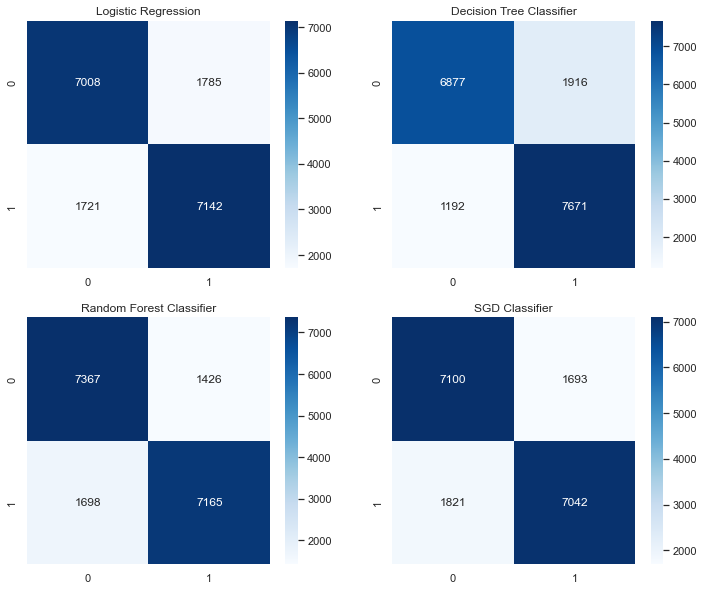

In [95]:
y_pred_lr = lr_best_model.predict(xtest)
conf_matrix_lr = confusion_matrix(ytest, y_pred_lr)

y_pred_dt = best_dt_model.predict(xtest)
conf_matrix_dt = confusion_matrix(ytest, y_pred_dt)

y_pred_rf = best_rf_model.predict(xtest)
conf_matrix_rf = confusion_matrix(ytest, y_pred_rf)

y_pred_sgd = best_sgd_model.predict(xtest)
conf_matrix_sgd = confusion_matrix(ytest, y_pred_sgd)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Classifier')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Classifier')

sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('SGD Classifier')

plt.show()

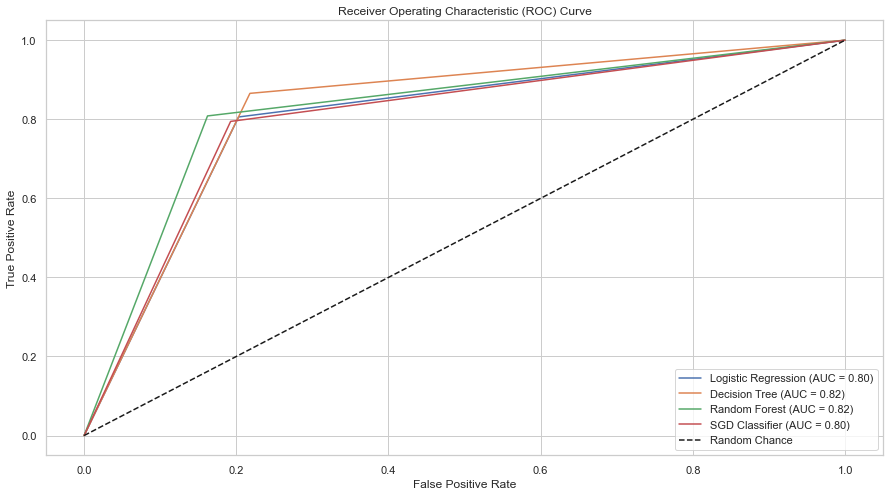

In [96]:
def plot_roc_curve(model, x, y, model_name):
    y_pred = model.predict(x)
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_score = roc_auc_score(y, y_pred)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.figure(figsize=(15, 8))

plot_roc_curve(lr_best_model, xtest, ytest, 'Logistic Regression')
plot_roc_curve(best_dt_model, xtest, ytest, 'Decision Tree')
plot_roc_curve(best_rf_model, xtest, ytest, 'Random Forest')
plot_roc_curve(best_sgd_model, xtest, ytest, 'SGD Classifier')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [97]:
models = {
    'Logistic Regression': lr_best_model,
    'Decision Tree': best_dt_model,
    'Random Forest': best_rf_model,
    'SGD Classifier': best_sgd_model,
}

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted'),
}


results = {metric: [] for metric in scoring}

for model_name, model in models.items():
    for metric, scorer in scoring.items():
        scores = cross_val_score(model, xtest, ytest, cv=5, scoring=scorer)
        results[metric].append((model_name, scores.mean(), scores.std()))

for metric, scores in results.items():
    print(f"\n{metric}:\n{'=' * len(metric)}")
    for model_name, mean_score, std_score in scores:
        print(f"{model_name}: {mean_score:.4f} (± {std_score:.4f})")



Accuracy:
Logistic Regression: 0.8015 (± 0.0077)
Decision Tree: 0.7987 (± 0.0109)
Random Forest: 0.8020 (± 0.0075)
SGD Classifier: 0.7975 (± 0.0098)

Precision:
Logistic Regression: 0.8017 (± 0.0075)
Decision Tree: 0.7990 (± 0.0107)
Random Forest: 0.8027 (± 0.0077)
SGD Classifier: 0.7989 (± 0.0098)

Recall:
Logistic Regression: 0.8015 (± 0.0077)
Decision Tree: 0.7987 (± 0.0109)
Random Forest: 0.8020 (± 0.0075)
SGD Classifier: 0.7975 (± 0.0098)

F1 Score:
Logistic Regression: 0.8015 (± 0.0077)
Decision Tree: 0.7986 (± 0.0109)
Random Forest: 0.8019 (± 0.0075)
SGD Classifier: 0.7973 (± 0.0098)
